# <p align="center">Siemens Sales Forecast</p>

---

## <p align="center">*2 - Feature Selection & Modeling*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *April 1, 2025*  
📍 **Prepared for:** *Siemens*  

**GitHub Repo:** https://github.com/MGN19/Siemens-forecast

---

# ToC

<a class="anchor" id="top"></a>


1. [Import Libraries & Data](#1.-Import-Libraries-&-Data) <br>

2. [Feature Selection](#2.-Feature-Selection) <br>

3. [Model Training](#3.-Model-Training) <br>

4. [Results Comparison](#4.-Results-Comparison) <br>

# 1. Import Libraries & Data

In [1]:
import os
import pandas as pd
import json
import re

# Models
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import HistGradientBoostingRegressor

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")


# External Files
import fs_modelling as fs
import utils as u

**Data**

In [2]:
X_train = pd.read_csv('./data/X_train_data/X_train.csv', index_col = 'Unnamed: 0')
X_val = pd.read_csv('./data/X_val_data/X_val.csv', index_col = 'Unnamed: 0')

def import_all_csvs(folder):
    """Imports all CSV files from a given folder and tracks variable names."""
    var_list = []

    for file in os.listdir(folder):
        if file.endswith('.csv'):
            df_name = file.replace('.csv', '')
            df = pd.read_csv(os.path.join(folder, file), index_col='Unnamed: 0')
            globals()[df_name] = df  # Save as a global variable
            var_list.append(df_name)  # Track variable name
    
    return var_list

# Import each CSV file as individual DataFrames
y_train_list = import_all_csvs('data/y_train_data')
y_val_list = import_all_csvs('data/y_val_data')

**Scaling**

In [3]:
X_train_scaled, X_val_scaled = fs.scale_data(X_train, 
                                          X_val, 
                                          scaler_type='minmax')

# 2. Feature Selection

In [4]:
selected_features = {}

for y_train_name in y_train_list:
    y_train = globals()[y_train_name]

    print(f'\n Next Feature {y_train_name}... \n')

    selected_features[y_train_name] = fs.feature_selection(
        X_train_scaled, 
        y_train, 
        method='all', # all but LASSO because it was mostly selecting 0 features
        rfe_model=XGBRegressor(), # use fo lgbm verbose = -1
        mi_threshold = 0.05,
        plot=False
    )
    


# Save
with open("utils.py", "a") as f:
    f.write(f"\n\n\nfs_mm_xgb4 = {repr(selected_features)}")



 Next Feature y_train_36... 

Selected 143 features by correlation
Selected 1 features by RFECV
Selected 79 features by importance with threshold 0.0021551724137931034
Selected 128 features by Mutual Information
Selected 0 features that intersect across all methods

 Next Feature y_train_8... 

Selected 143 features by correlation


KeyboardInterrupt: 

**Final Features**

In [24]:
features = u.fs_mm_xgb4
features

{'y_train_36': ['#8_Lag_3',
  'Year',
  '#9_Lag_12',
  'CC_UK_Lag_12_RollingMean3',
  '#14_Lag_1'],
 'y_train_8': ['#12_Lag_12',
  '#16_Lag_1_RollingMean3',
  'CHI Production Index_Lag_12',
  '#11_Lag_1_RollingMean6',
  '#11_Lag_1',
  'Clean_Ita_Lag_12'],
 'y_train_20': ['Clean_Chi_Lag_12',
  '#16_Lag_1',
  '#12_Lag_1_RollingMean3',
  '#1_Lag_1_RollingMean6',
  '#5_Lag_1',
  'Fossil_Chi_Lag_12_RollingMean6',
  '#16_Lag_3_RollingMean6',
  'Fossil_US_Lag_12_RollingMean3'],
 'y_train_9': ['#14_Lag_6',
  '#20_Lag_1',
  '#36_Lag_1',
  'Fossil_Chi_Lag_12_RollingMean6',
  'CC_UK_Lag_12_RollingMean3',
  'GER EE Production Index_Lag_12'],
 'y_train_4': ['#16_Lag_1',
  '(W) Price of Base Metals_Lag_12',
  '#6_Lag_1_RollingMean3',
  '#3_Lag_1',
  '#12_Lag_1',
  'Clean_US_Lag_12_RollingMean6'],
 'y_train_11': ['#12_Lag_3',
  '#1_Lag_1_RollingMean3',
  'GerHolidayCount',
  '#3_Lag_1',
  'FRA EE Producer Prices_Lag_12_RollingMean6'],
 'y_train_5': ['#12_Lag_12',
  'CC_UK_Lag_12',
  '#20_Lag_1',
  '#

# 3. Model Training

### ARIMA


 Training model for Product Category 36


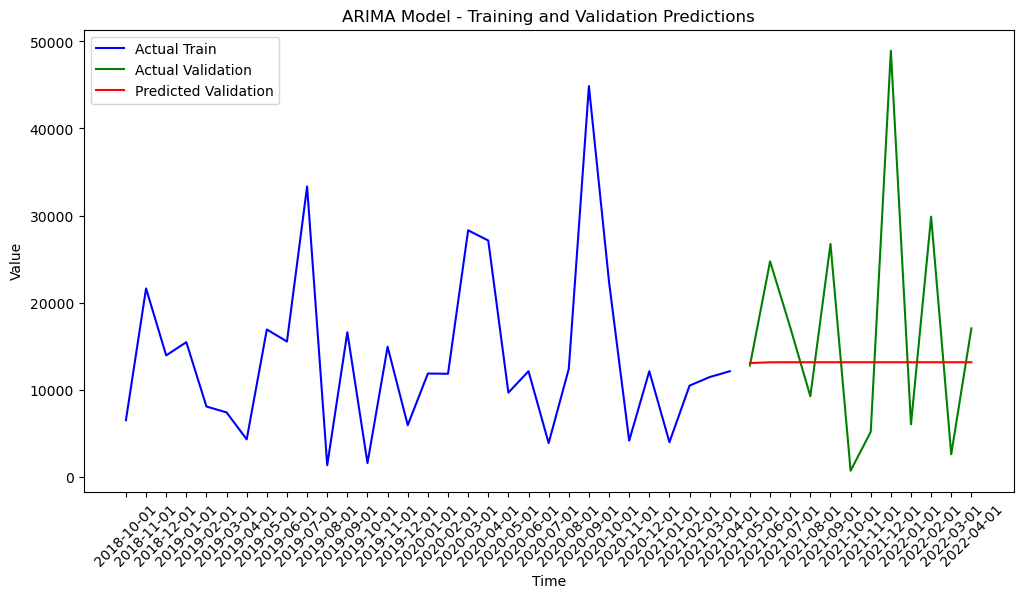

Results appended to ./results/36_results.csv

 Training model for Product Category 8


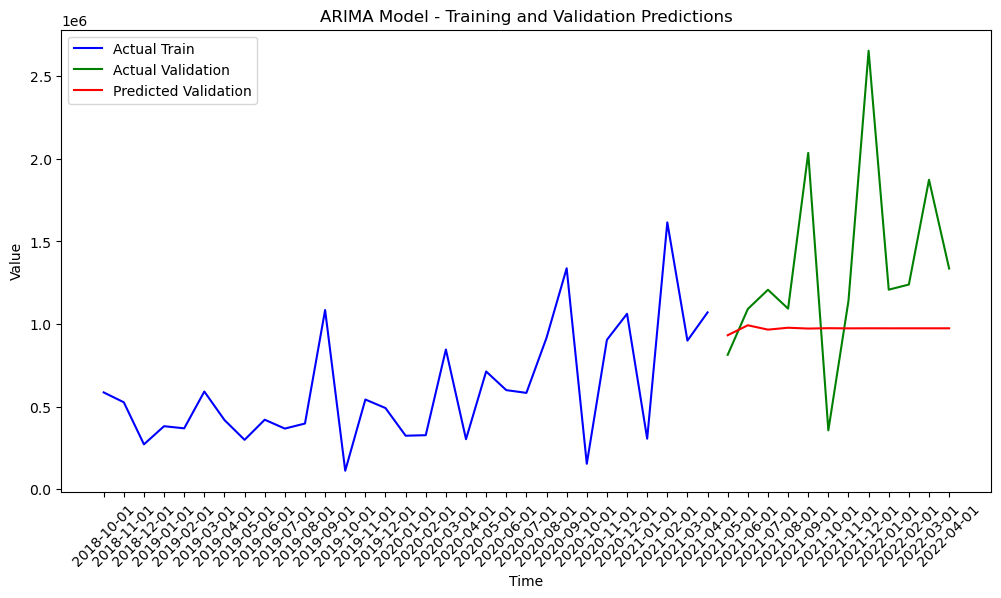

Results appended to ./results/8_results.csv

 Training model for Product Category 20


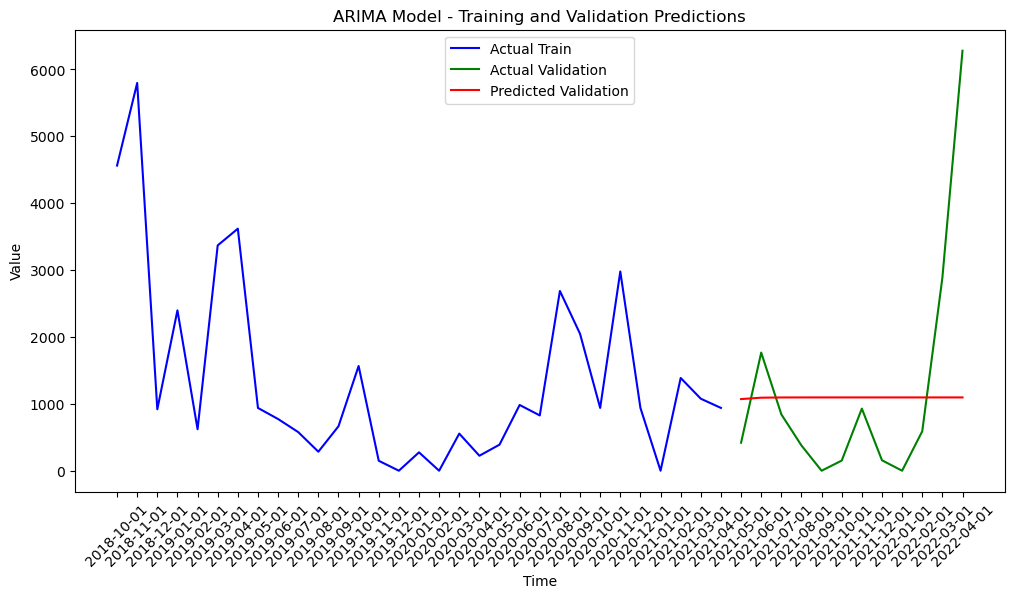

Results appended to ./results/20_results.csv

 Training model for Product Category 9


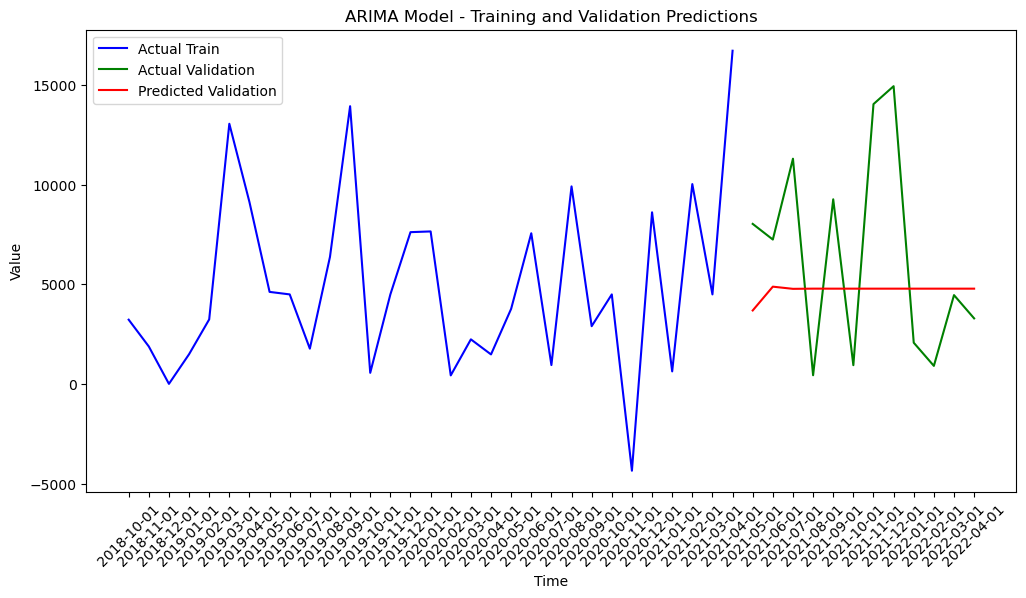

Results appended to ./results/9_results.csv

 Training model for Product Category 4


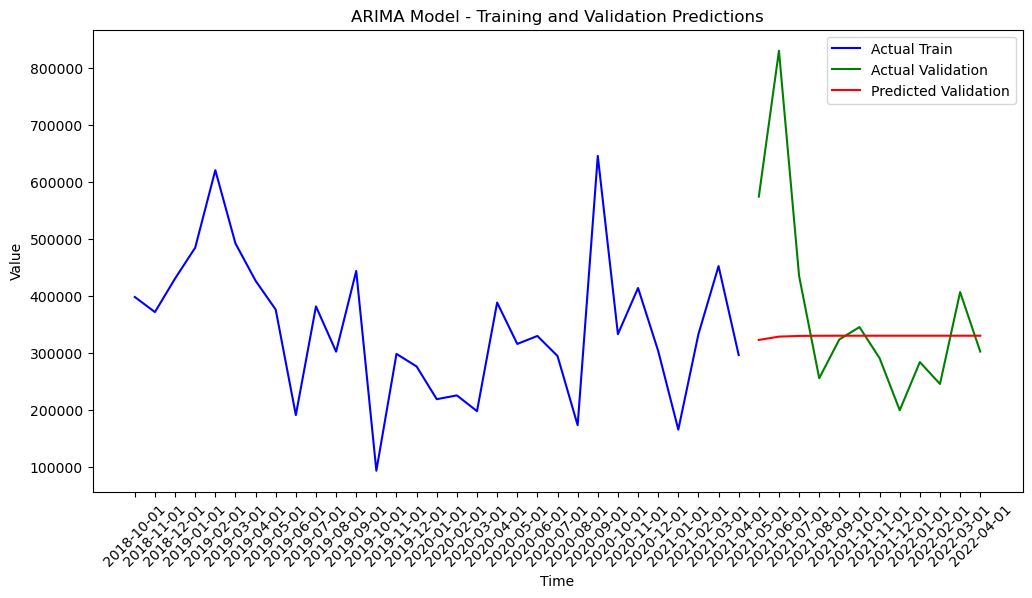

Results appended to ./results/4_results.csv

 Training model for Product Category 11


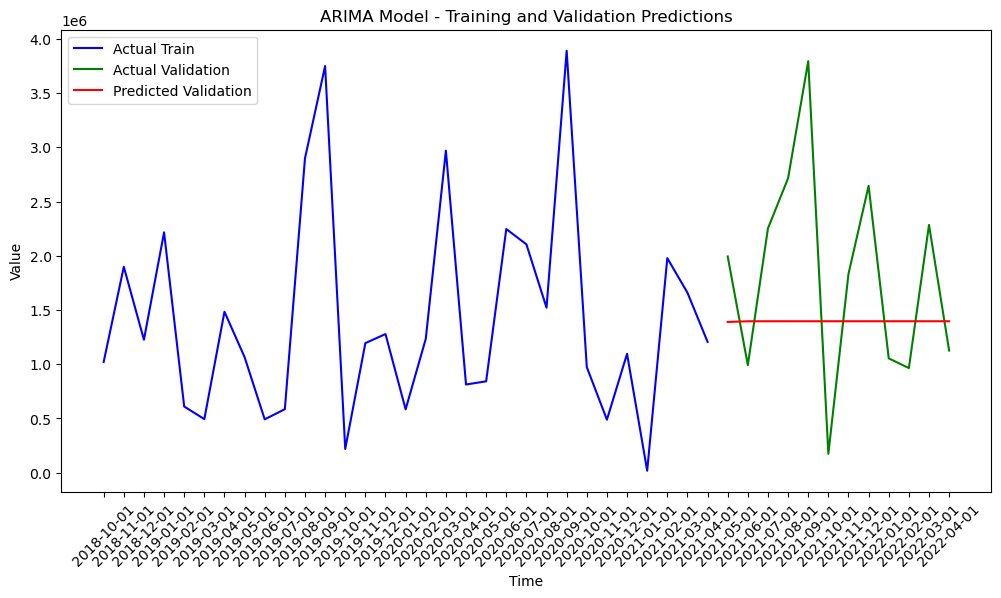

Results appended to ./results/11_results.csv

 Training model for Product Category 5


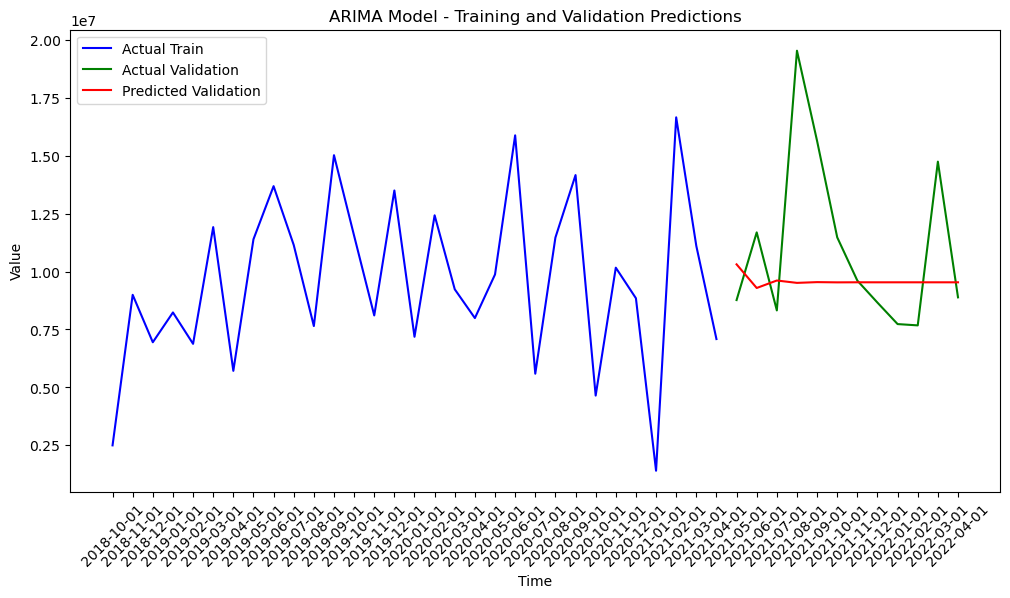

Results appended to ./results/5_results.csv

 Training model for Product Category 12


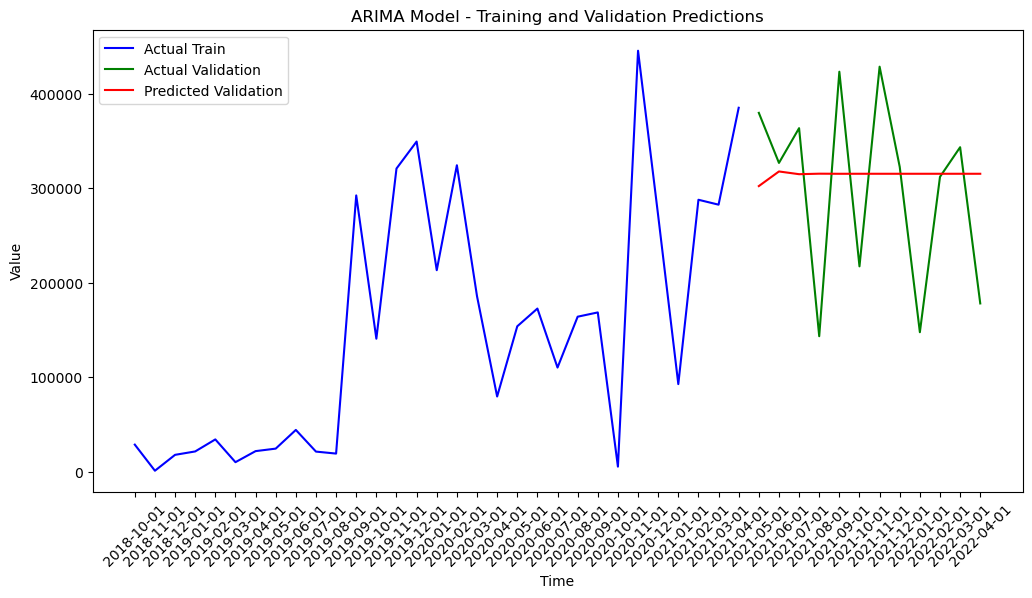

Results appended to ./results/12_results.csv

 Training model for Product Category 13


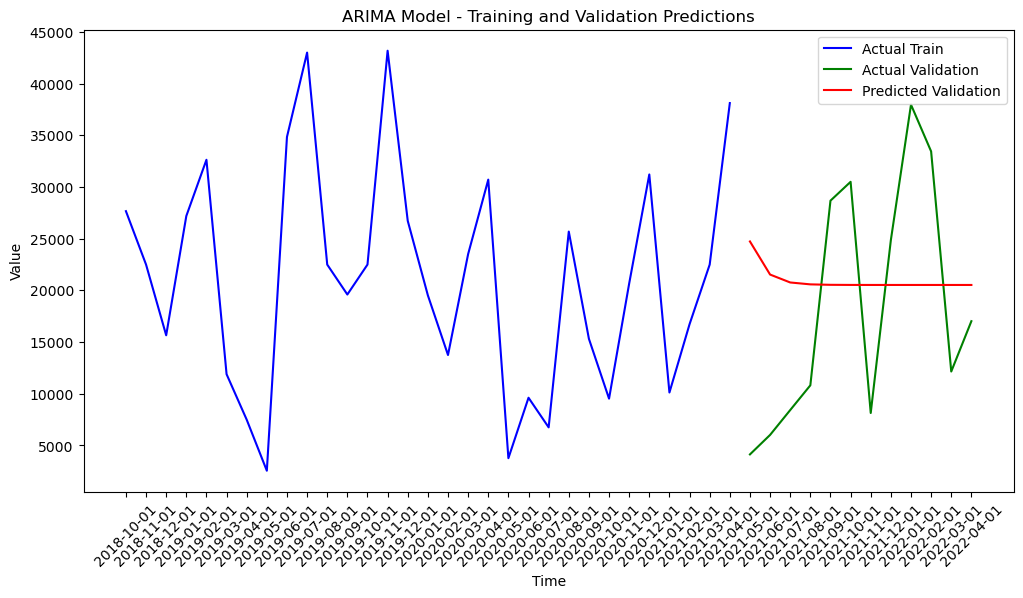

Results appended to ./results/13_results.csv

 Training model for Product Category 6


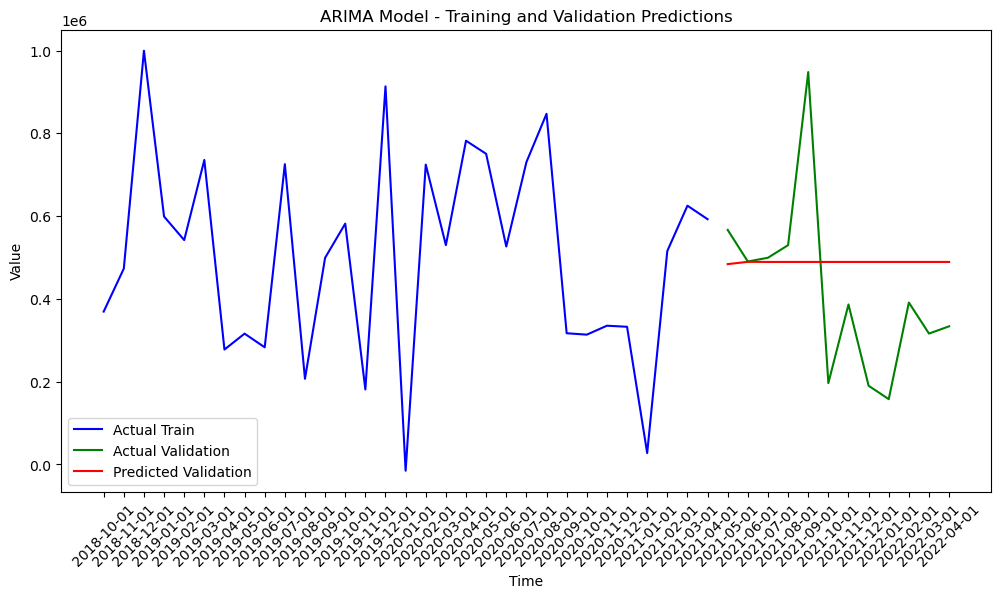

Results appended to ./results/6_results.csv

 Training model for Product Category 16


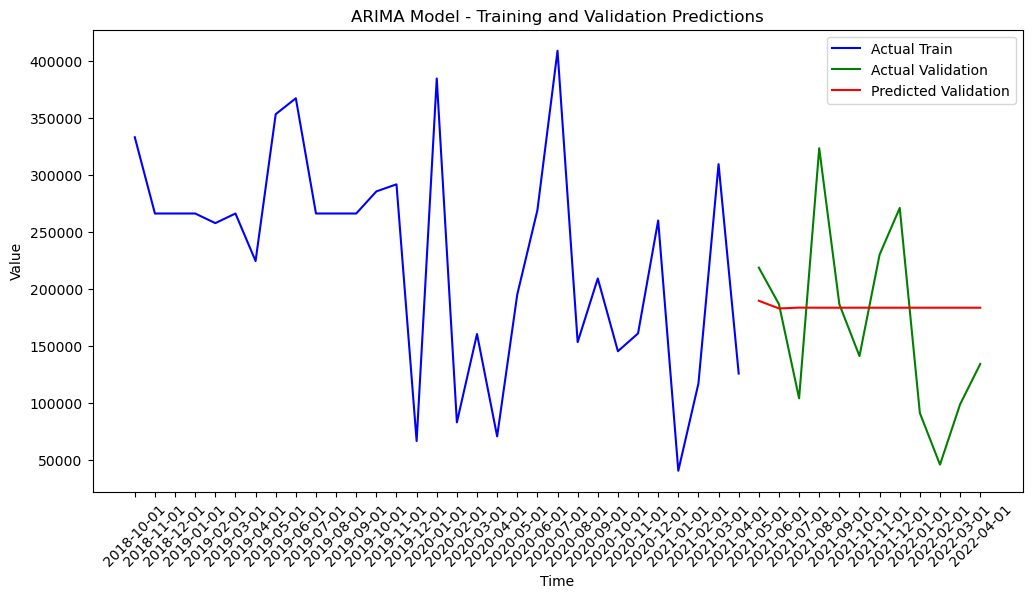

Results appended to ./results/16_results.csv

 Training model for Product Category 3


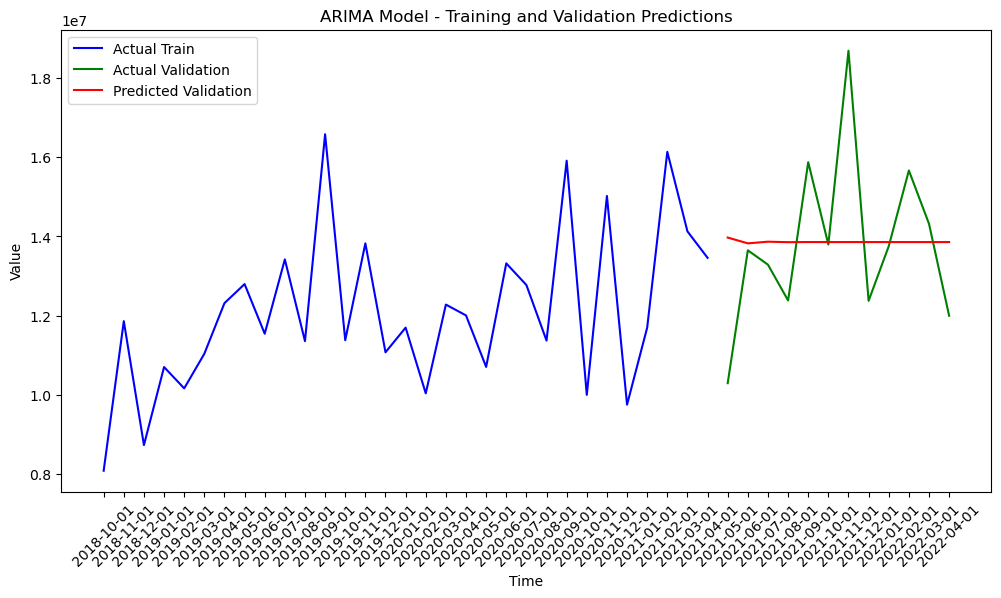

Results appended to ./results/3_results.csv

 Training model for Product Category 1


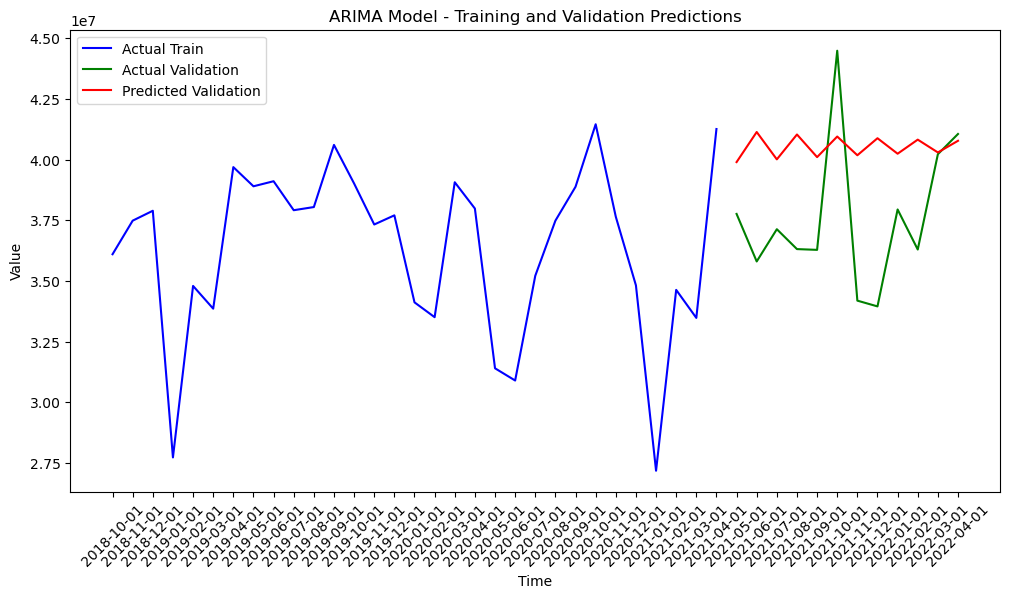

Results appended to ./results/1_results.csv

 Training model for Product Category 14


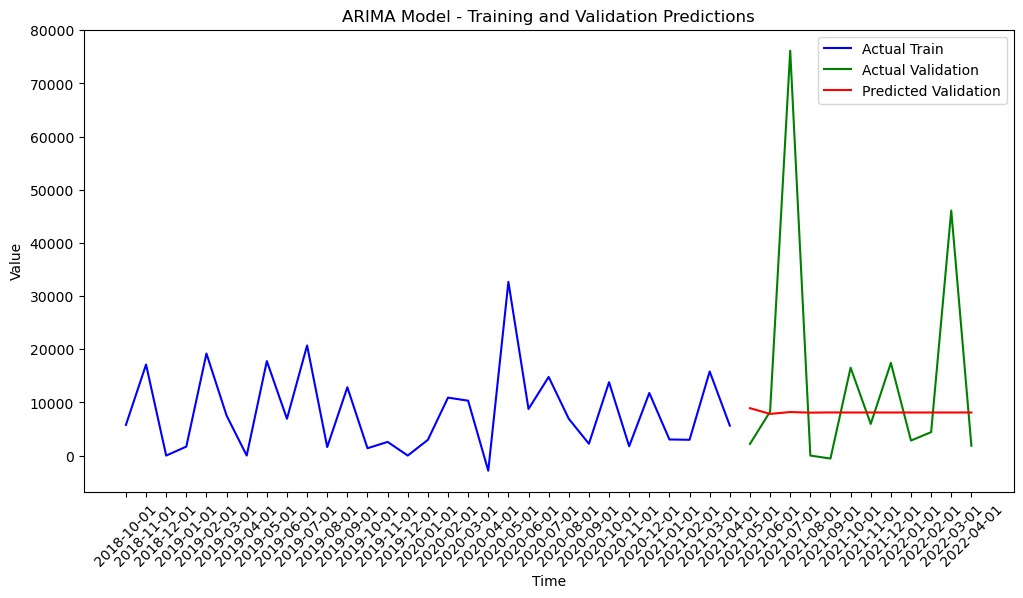

Results appended to ./results/14_results.csv


In [6]:
# Empty dicts
model_fits = {}
val_preds = {}
model_summaries = {}

# ARIMA for all Product Categ
for target_name, selected_features in features.items():
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')

    # Fit the ARIMA model using fs.stats_models method
    model_fits[target_number], val_preds[target_number], model_summaries[target_number] = fs.stats_models(
        'arima', X_train_scaled, X_val_scaled, 
        target_train, target_val, order=(1, 1, 1),
        plot=True,
        csv_path=f'./results/{target_number}_results.csv'
    )

In [22]:
#model_fit_ar, val_preds_ar, model_summary_ar = fs.stats_models('arima', X_train_scaled, X_val_scaled, 
#                                     y_train_1, y_val_1, order=(1,1,3),
#                                     plot = False, 
#                                     csv_path = './modelling_csvs/test3.csv')

**Example for prediction on test data**

In [16]:
steps_ahead = 30  # Number of future steps you want to predict
future_preds = model_fits['36'].forecast(steps=steps_ahead)
print(future_preds)


2021-05-01     1923.405189
2021-06-01    54188.938431
2021-07-01    43331.492644
2021-08-01    45586.977697
2021-09-01    45118.431694
2021-10-01    45215.765683
2021-11-01    45195.545885
2021-12-01    45199.746270
2022-01-01    45198.873698
2022-02-01    45199.054963
2022-03-01    45199.017308
2022-04-01    45199.025130
2022-05-01    45199.023505
2022-06-01    45199.023843
2022-07-01    45199.023772
2022-08-01    45199.023787
2022-09-01    45199.023784
2022-10-01    45199.023785
2022-11-01    45199.023785
2022-12-01    45199.023785
2023-01-01    45199.023785
2023-02-01    45199.023785
2023-03-01    45199.023785
2023-04-01    45199.023785
2023-05-01    45199.023785
2023-06-01    45199.023785
2023-07-01    45199.023785
2023-08-01    45199.023785
2023-09-01    45199.023785
2023-10-01    45199.023785
Freq: MS, Name: predicted_mean, dtype: float64


### SARIMAX

In [17]:
# Empty dicts
model_fits_sarx = {}
val_preds_sarx = {}
model_summaries_sarx = {}

# SARIMAX for all Product Categ
for target_name, selected_features in features.items():
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')


    # Only selected features
    X_train_target = X_train_scaled[selected_features] 
    X_val_target = X_val_scaled[selected_features] 

    # Fit the SARIMAX model using fs.stats_models method
    model_fits_sarx[target_number], val_preds_sarx[target_number], model_summaries_sarx[target_number] = fs.stats_models(
        'sarimax', X_train_target, X_val_target, 
        target_train, target_val,
        plot=True,
        csv_path=f'./results/{target_number}_results.csv'
    )


 Training model for Product Category 36


LinAlgError: LU decomposition error.

In [37]:
#model_fit_sarx, val_preds_sarx, model_summary_sarx = fs.stats_models('sarimax', X_train, X_val, 
#                                     y_train_1, y_val_1, order=(1,1,3),
#                                     plot = False, 
#                                     csv_path = './modelling_csvs/test3.csv')

**Example for prediction on test data**

In [83]:
X_future = X_val # temp
future_preds = model_fit_sarx.forecast(steps=len(X_future), exog=X_future)
print(future_preds)


2021-05-01    3.951051e+07
2021-06-01    4.180620e+07
2021-07-01    4.068981e+07
2021-08-01    4.485621e+07
2021-09-01    4.369701e+07
2021-10-01    4.223861e+07
2021-11-01    3.961871e+07
2021-12-01    4.288582e+07
2022-01-01    3.167765e+07
2022-02-01    3.317506e+07
2022-03-01    3.887002e+07
2022-04-01    4.574127e+07
Freq: MS, Name: predicted_mean, dtype: float64


### Prophet

12:02:33 - cmdstanpy - INFO - Chain [1] start processing
12:02:34 - cmdstanpy - INFO - Chain [1] done processing



 Training model for Product Category 36


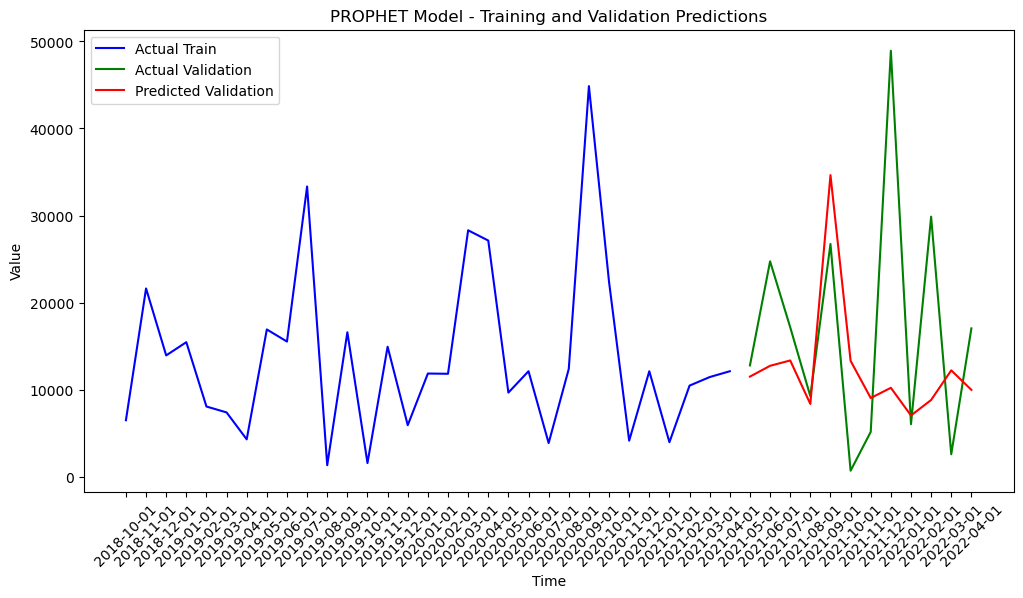

12:02:34 - cmdstanpy - INFO - Chain [1] start processing
12:02:34 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/36_results.csv

 Training model for Product Category 8


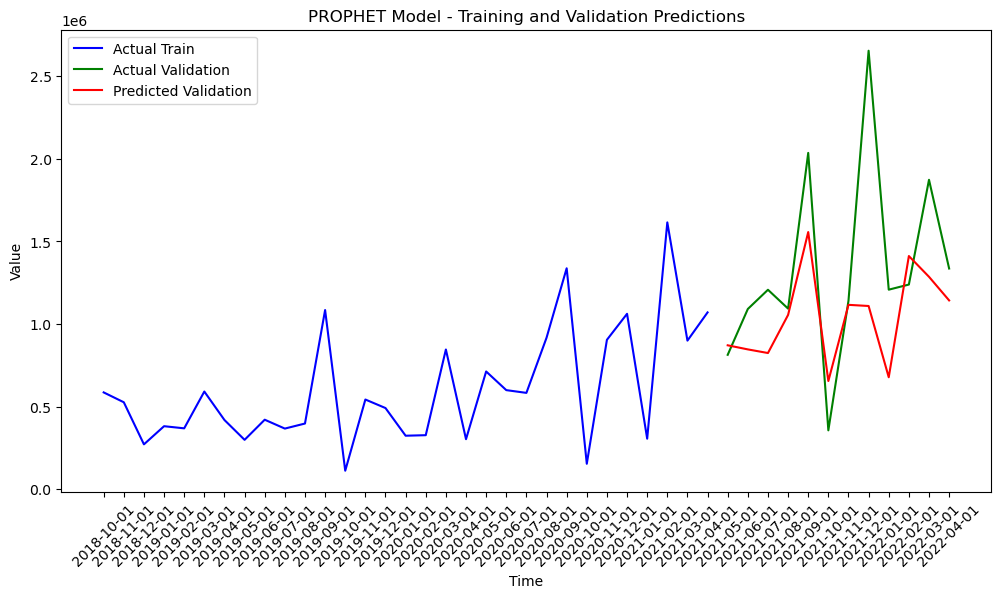

12:02:34 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./results/8_results.csv

 Training model for Product Category 20


12:02:35 - cmdstanpy - INFO - Chain [1] done processing


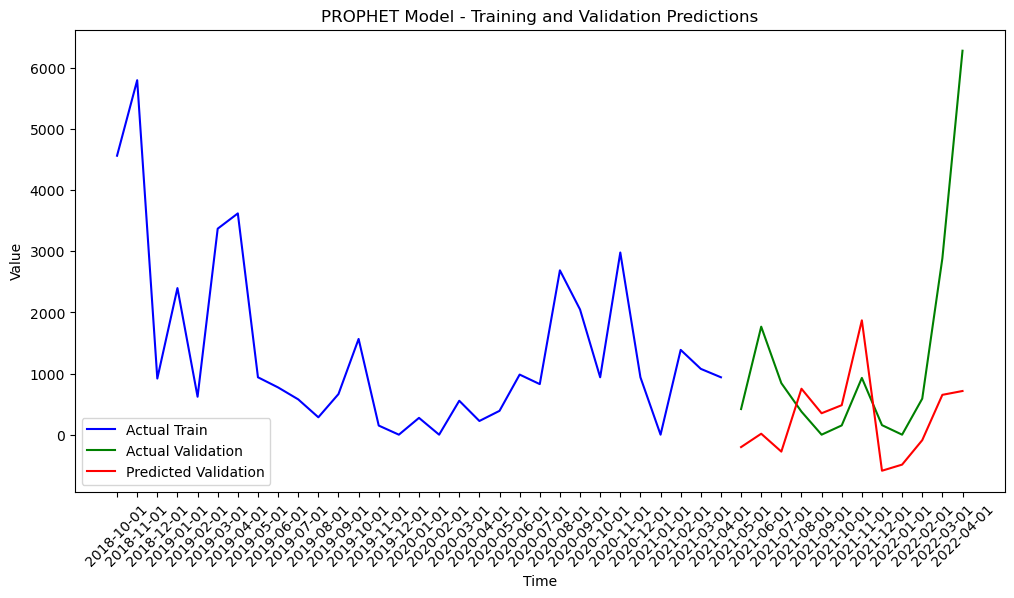

12:02:35 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./results/20_results.csv

 Training model for Product Category 9


12:02:35 - cmdstanpy - INFO - Chain [1] done processing


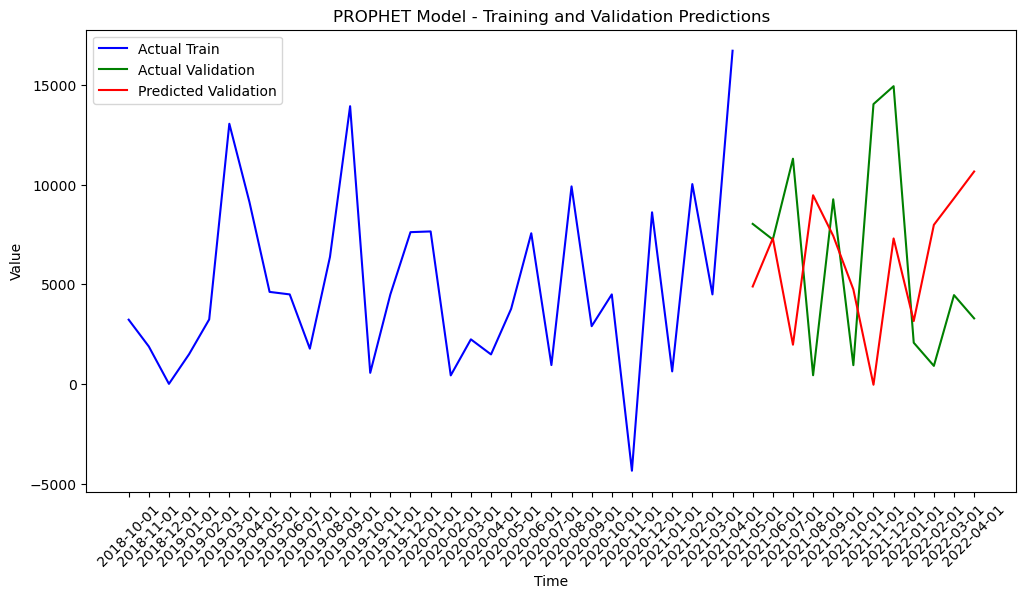

12:02:35 - cmdstanpy - INFO - Chain [1] start processing
12:02:36 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/9_results.csv

 Training model for Product Category 4


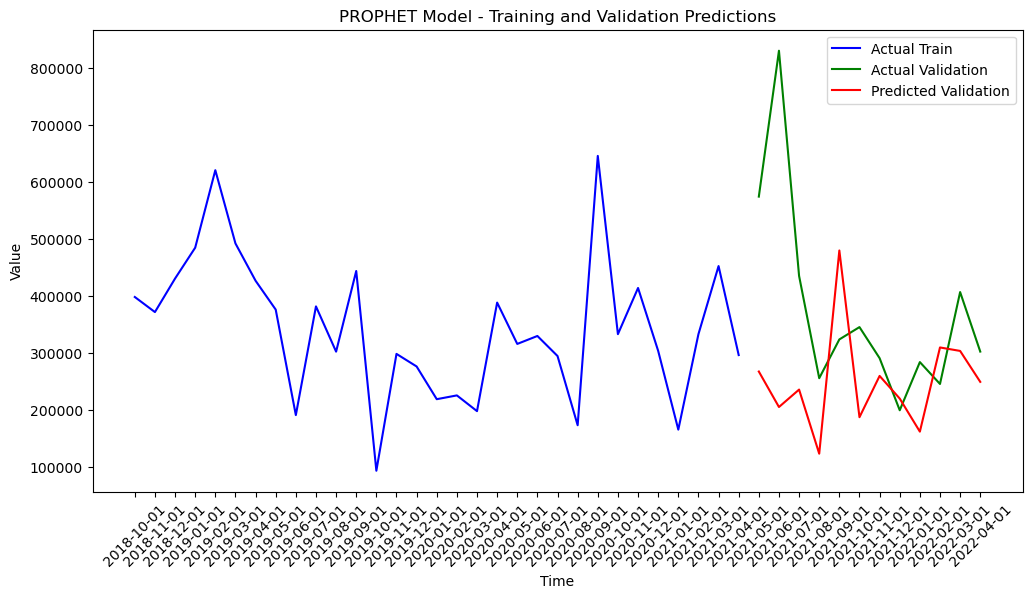

12:02:36 - cmdstanpy - INFO - Chain [1] start processing
12:02:36 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/4_results.csv

 Training model for Product Category 11


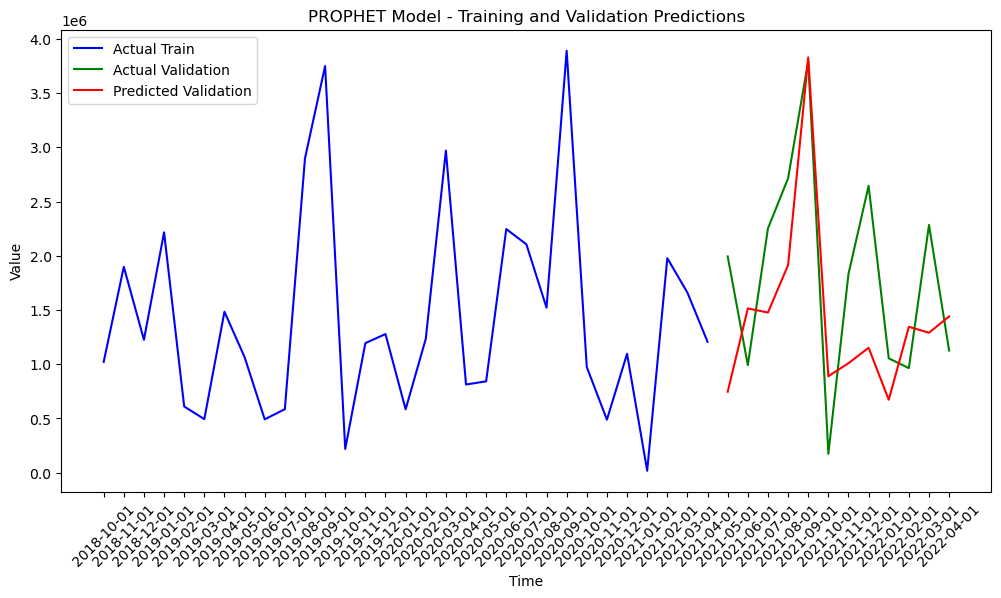

12:02:36 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./results/11_results.csv

 Training model for Product Category 5


12:02:37 - cmdstanpy - INFO - Chain [1] done processing


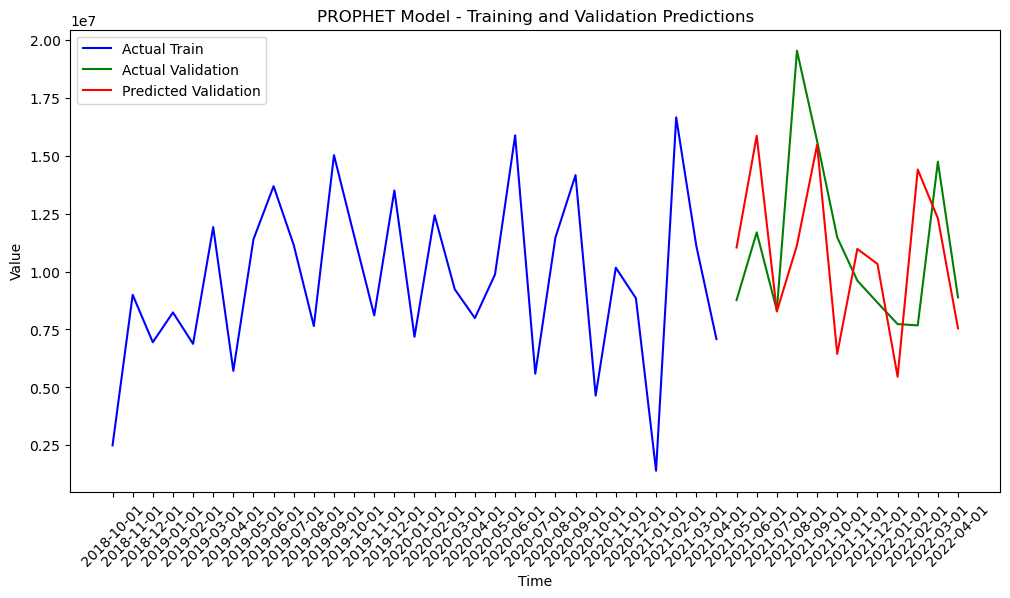

12:02:37 - cmdstanpy - INFO - Chain [1] start processing
12:02:37 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/5_results.csv

 Training model for Product Category 12


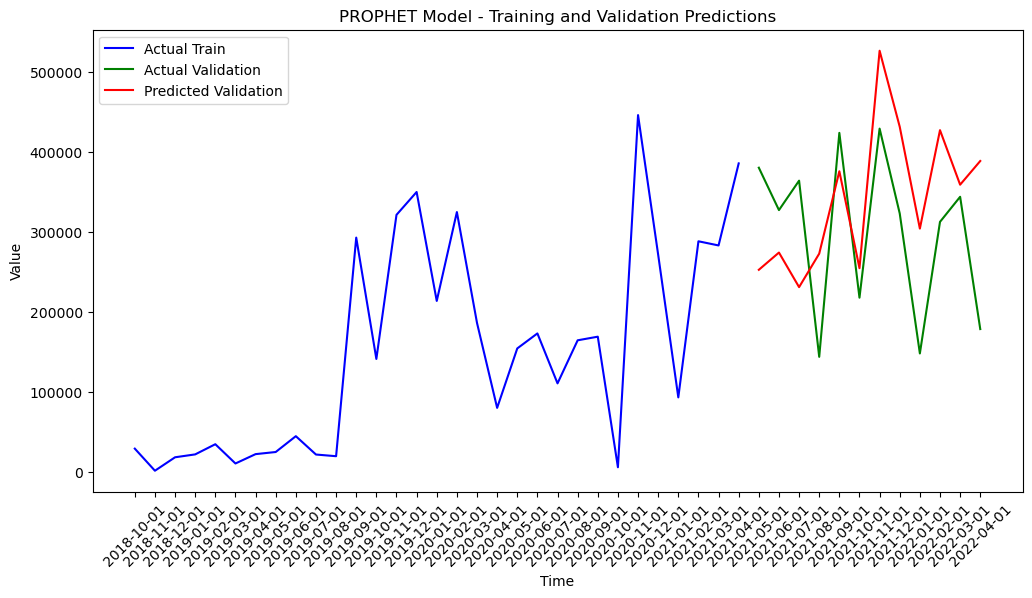

12:02:37 - cmdstanpy - INFO - Chain [1] start processing
12:02:37 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/12_results.csv

 Training model for Product Category 13


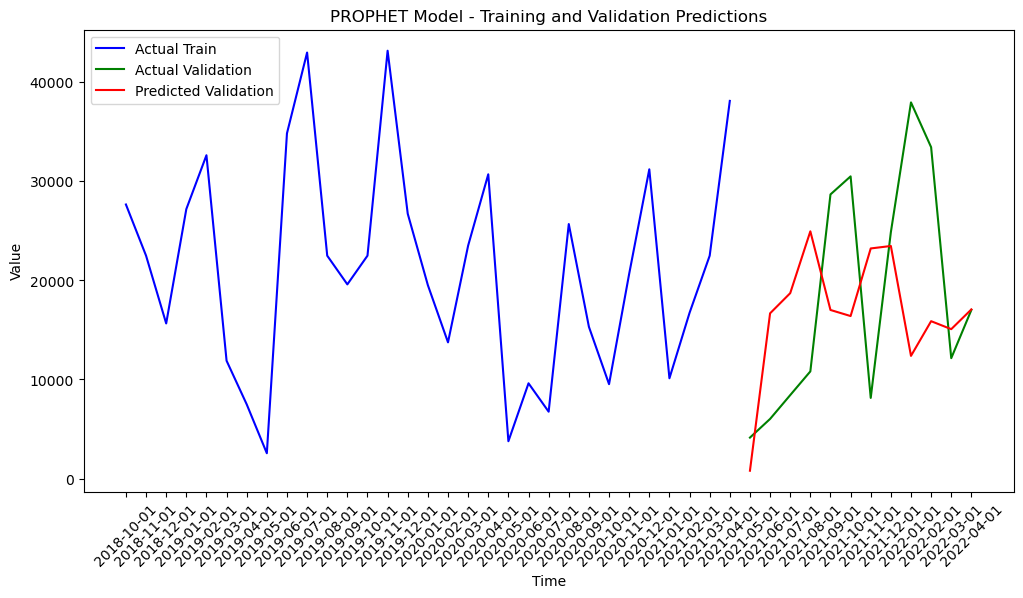

12:02:38 - cmdstanpy - INFO - Chain [1] start processing
12:02:38 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/13_results.csv

 Training model for Product Category 6


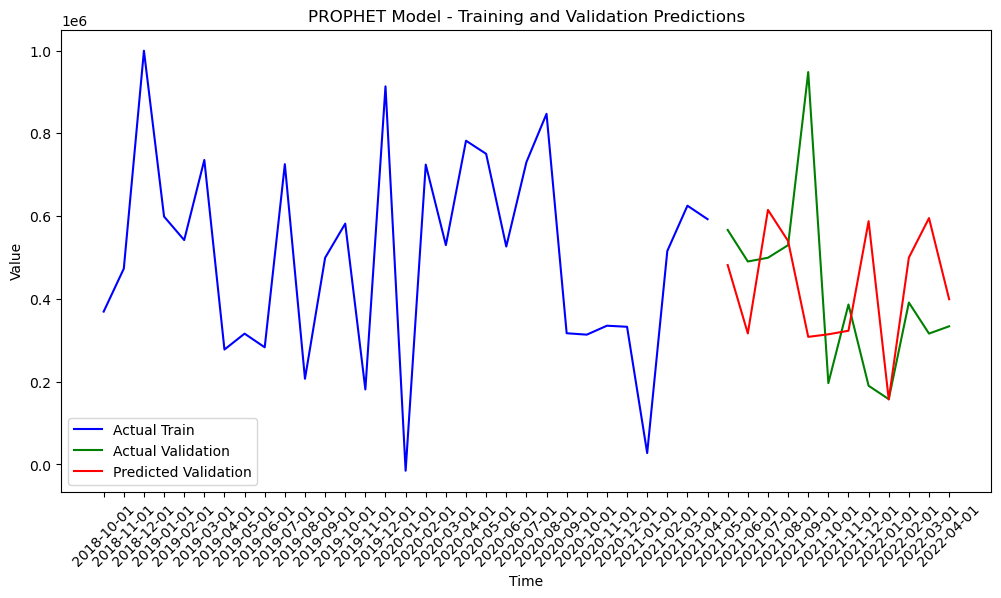

12:02:38 - cmdstanpy - INFO - Chain [1] start processing
12:02:38 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/6_results.csv

 Training model for Product Category 16


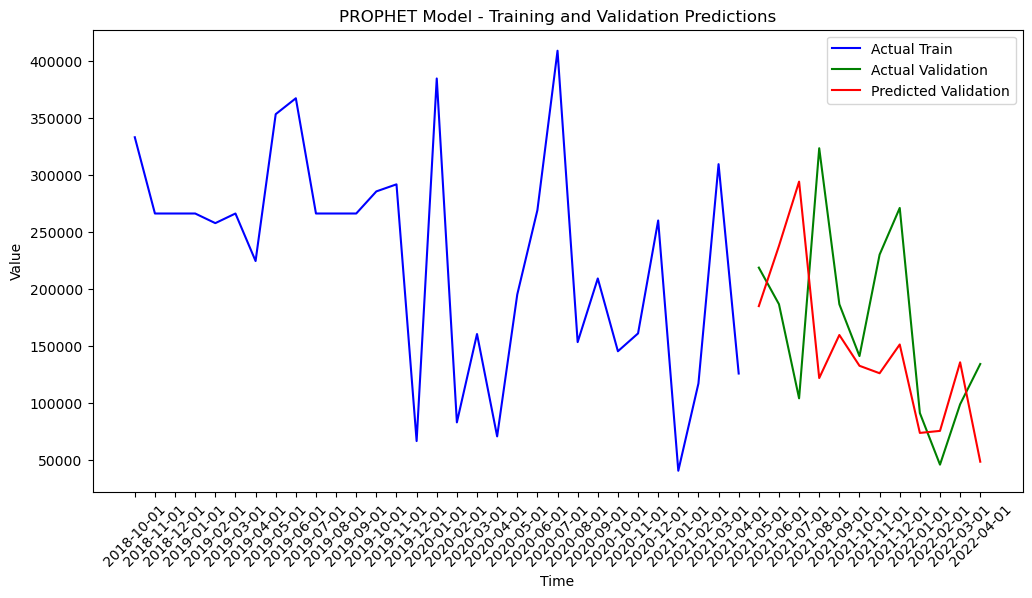

12:02:39 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./results/16_results.csv

 Training model for Product Category 3


12:02:39 - cmdstanpy - INFO - Chain [1] done processing


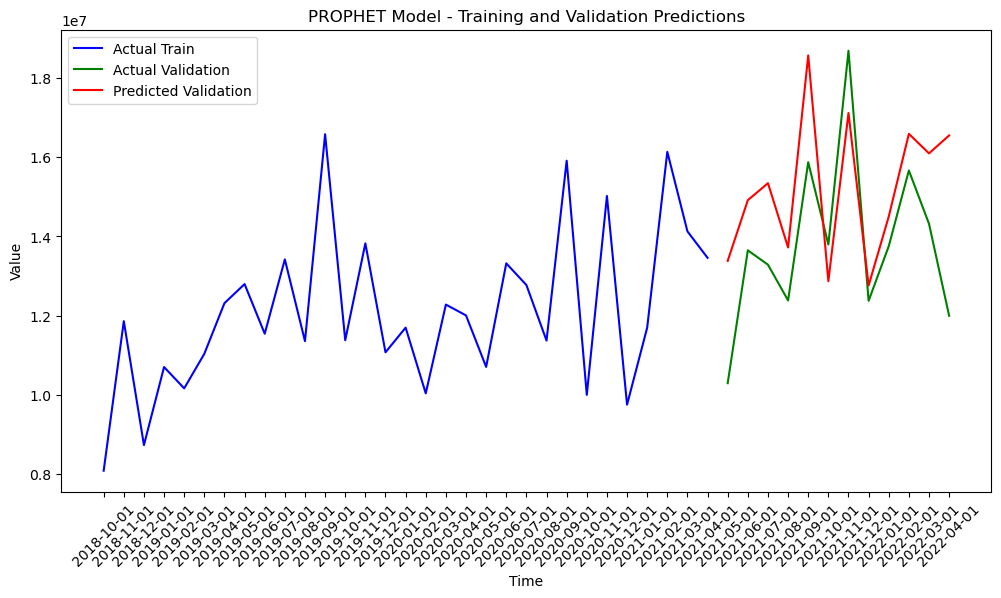

12:02:39 - cmdstanpy - INFO - Chain [1] start processing
12:02:39 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/3_results.csv

 Training model for Product Category 1


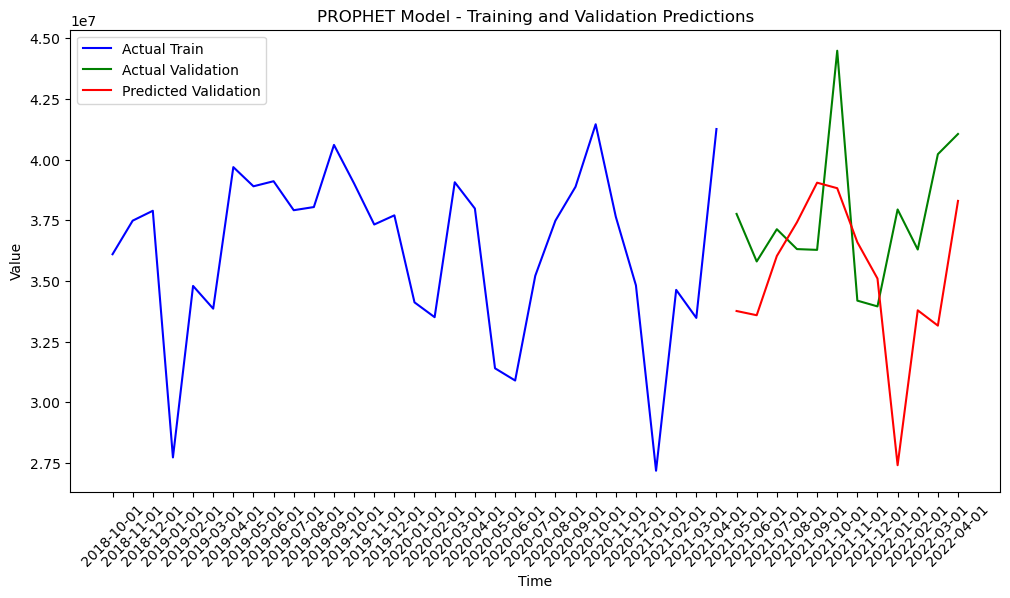

12:02:40 - cmdstanpy - INFO - Chain [1] start processing
12:02:40 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/1_results.csv

 Training model for Product Category 14


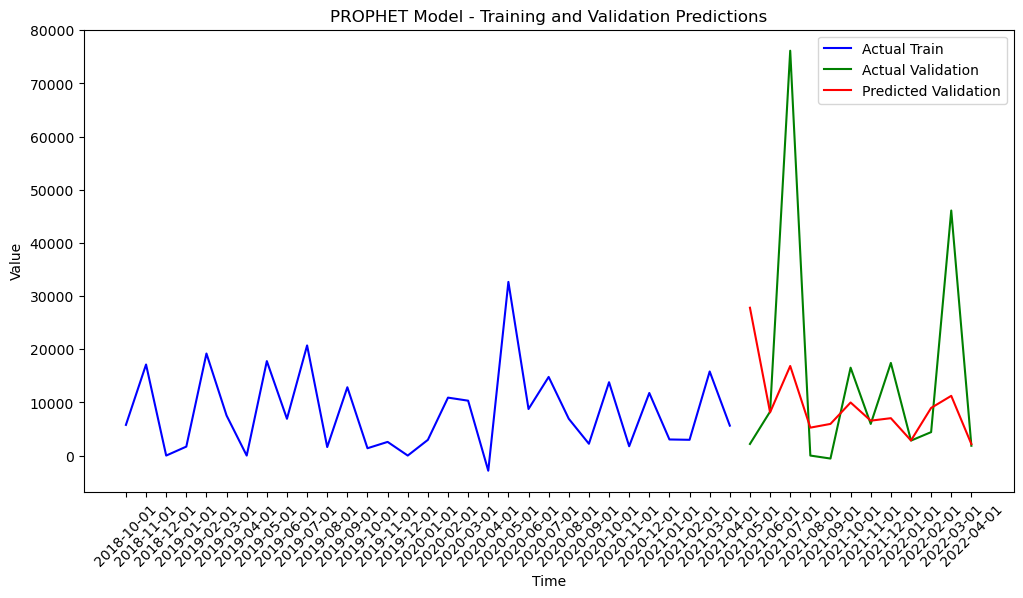

Results appended to ./results/14_results.csv


In [20]:
# Empty dicts
model_fits_p = {}
val_preds_p = {}

# ARIMA for all Product Categ
for target_name, selected_features in features.items():
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')

    # Fit the ARIMA model using fs.stats_models method
    model_fits_p[target_number], val_preds_p[target_number] = fs.stats_models(
        'prophet', X_train_scaled, X_val_scaled, 
        target_train, target_val,
        plot=True,
        csv_path=f'./results/{target_number}_results.csv'
    )

In [17]:
#model_fit_prof, val_preds_prof = fs.stats_models('prophet', X_train, X_val, 
#                                 y_train_1, y_val_1, order=(1,1,3),
#                                 plot = True, 
#                                 csv_path = './modelling_csvs/test3.csv')

**Example for prediction on test data**

In [27]:
future_dates = pd.date_range(start='2022-04-01', periods=10, freq='M')
future_df = pd.DataFrame({'ds': future_dates})

future_preds = model_fits_p['1'].predict(future_df) 
print(future_preds[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


          ds        yhat  yhat_lower  yhat_upper
0 2022-04-30 44230037.57 38236430.29 50195221.98
1 2022-05-31 44817559.25 38262593.71 51113067.81
2 2022-06-30 39046571.73 32798011.67 45652346.06
3 2022-07-31 39269534.84 33088050.45 45441356.87
4 2022-08-31 44791293.36 39279468.81 51409805.39
5 2022-09-30 39676180.20 33917216.39 45325386.93
6 2022-10-31 23836799.98 18054527.25 29183484.47
7 2022-11-30 49328602.69 43511678.07 55862069.39
8 2022-12-31 44519513.59 37965481.63 50569606.66
9 2023-01-31 36230834.58 30094027.74 42662814.91


### ML Models


 Training model for Product Category 36


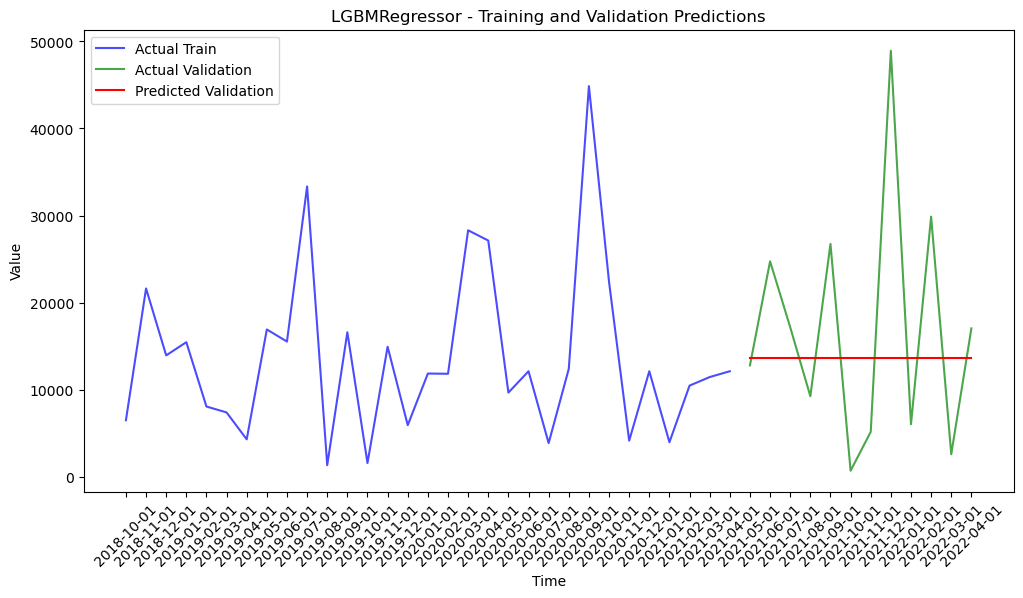

Results appended to ./results/36_results.csv

 Training model for Product Category 8


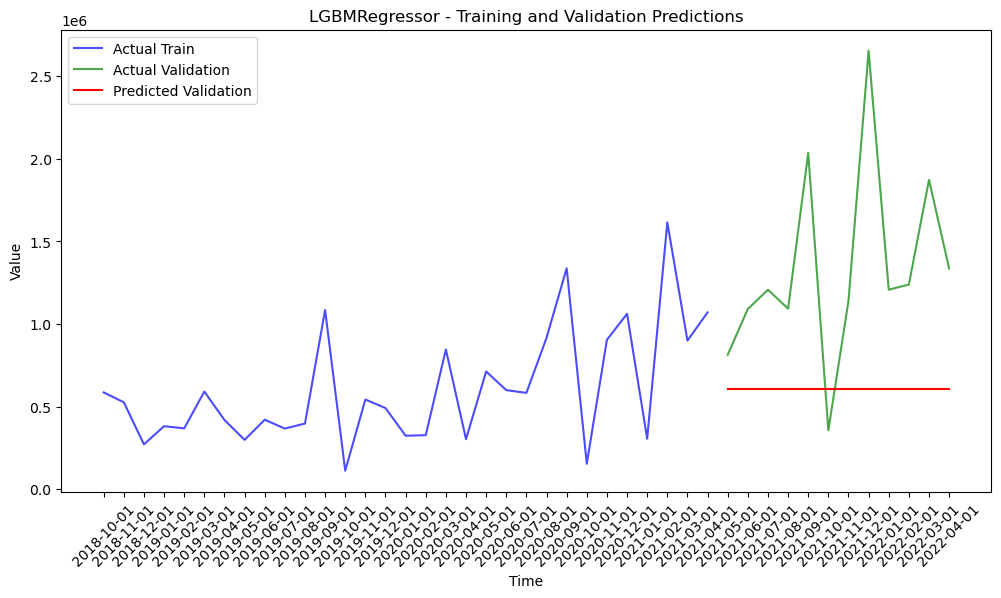

Results appended to ./results/8_results.csv

 Training model for Product Category 20


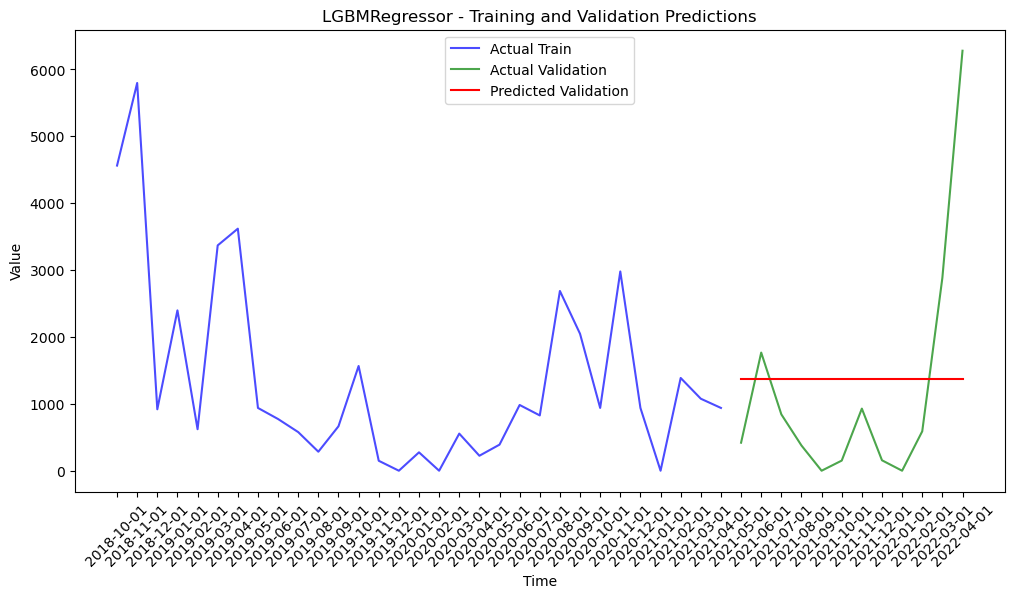

Results appended to ./results/20_results.csv

 Training model for Product Category 9


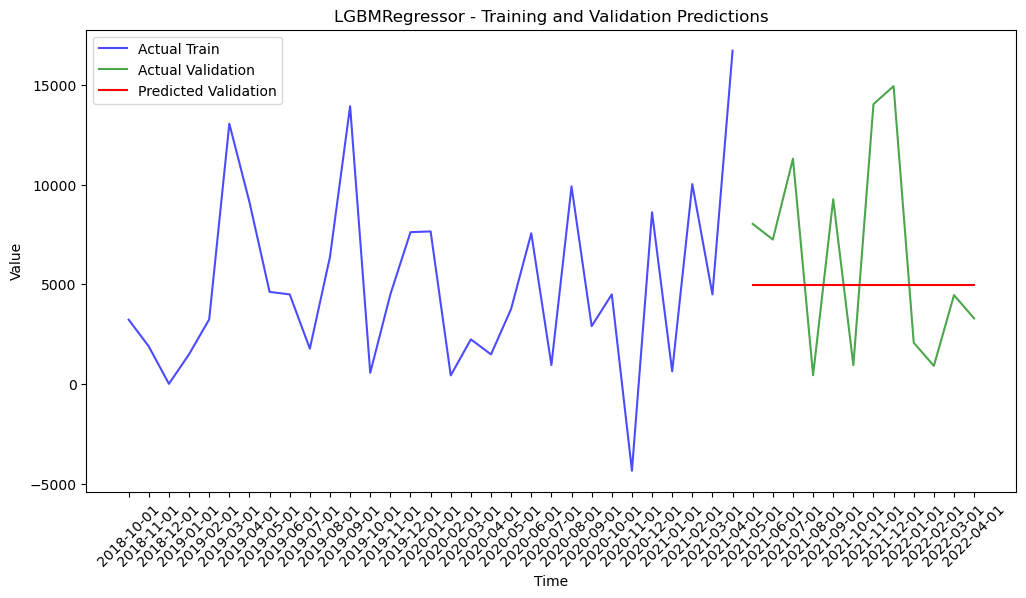

Results appended to ./results/9_results.csv

 Training model for Product Category 4


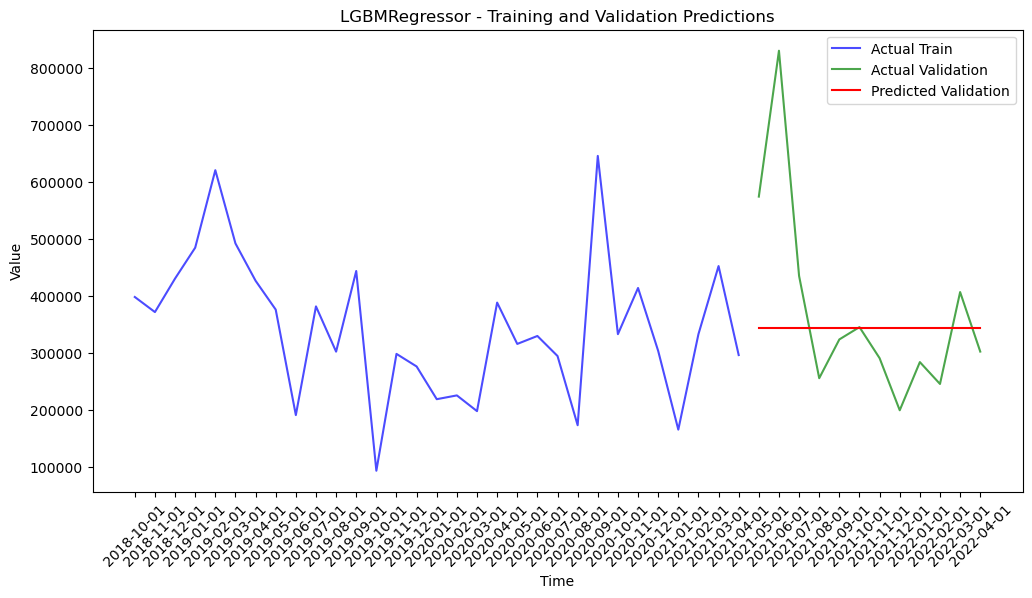

Results appended to ./results/4_results.csv

 Training model for Product Category 11


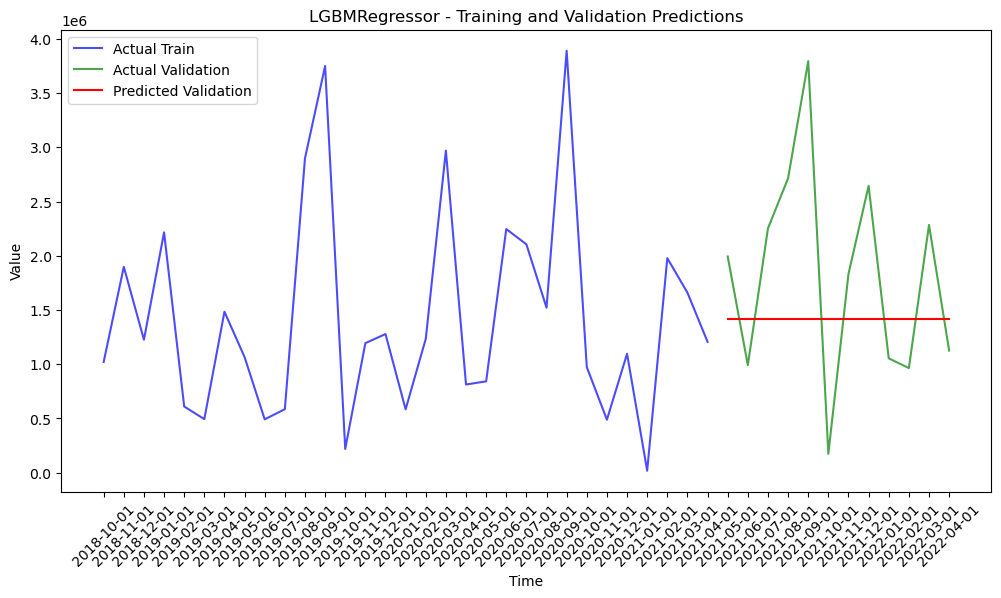

Results appended to ./results/11_results.csv

 Training model for Product Category 5


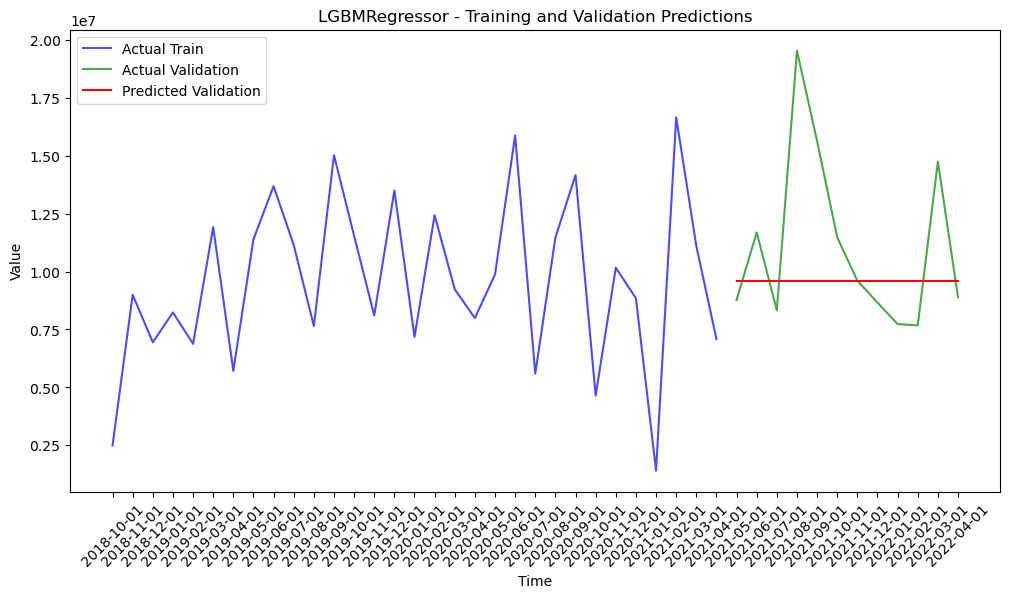

Results appended to ./results/5_results.csv

 Training model for Product Category 12


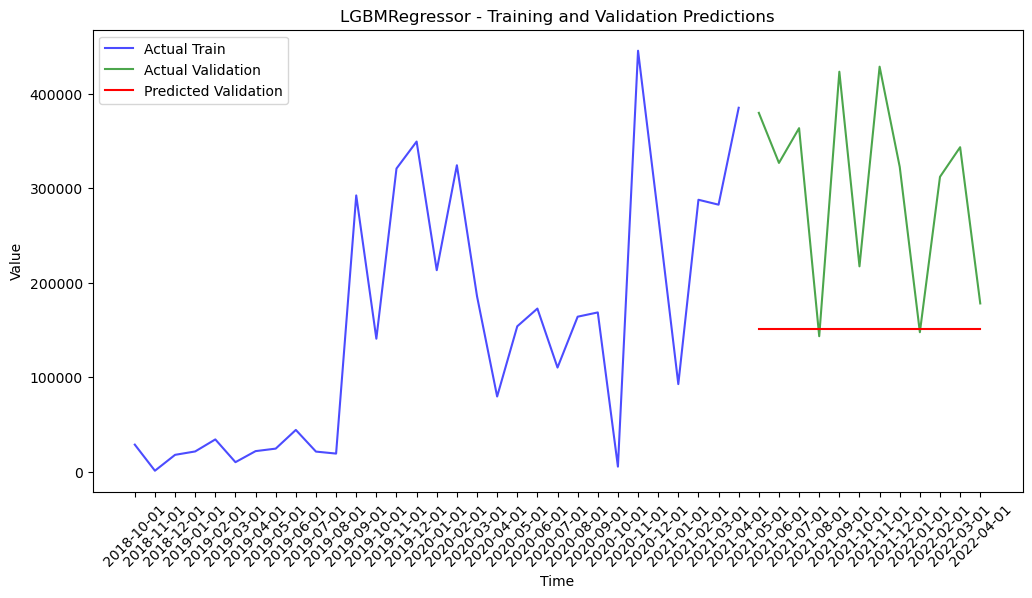

Results appended to ./results/12_results.csv

 Training model for Product Category 13


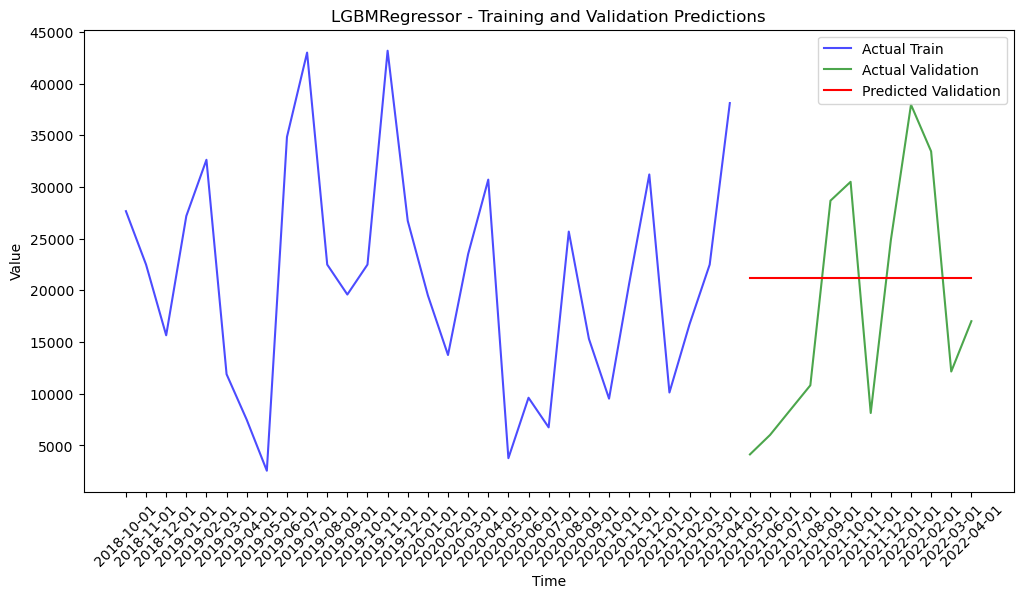

Results appended to ./results/13_results.csv

 Training model for Product Category 6


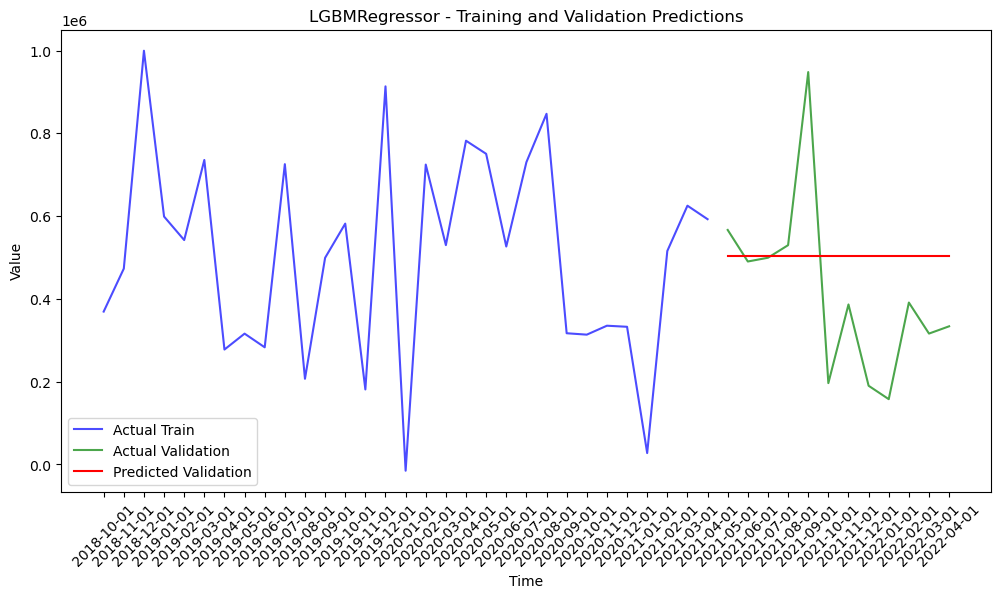

Results appended to ./results/6_results.csv

 Training model for Product Category 16


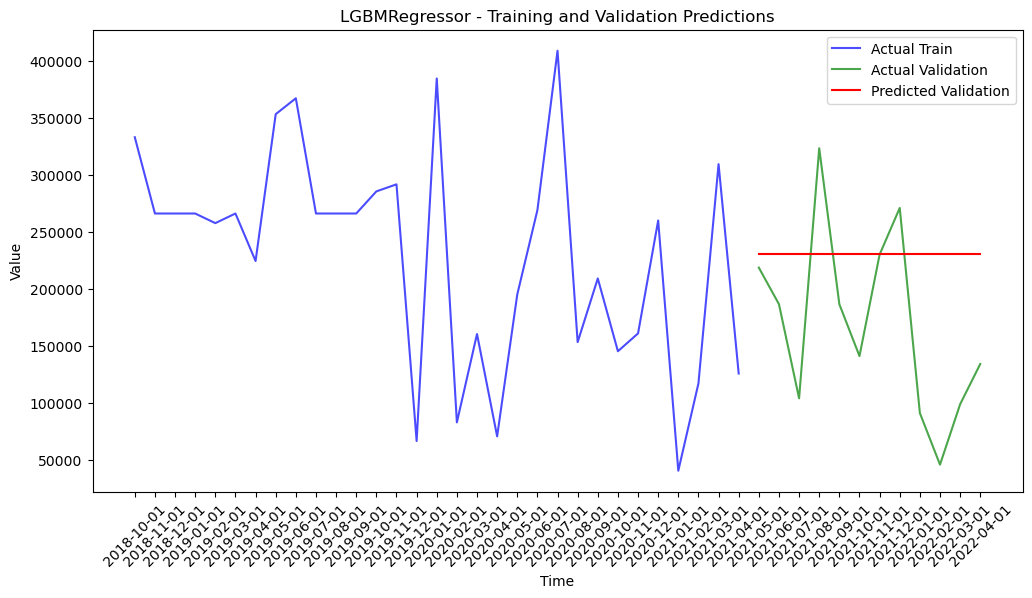

Results appended to ./results/16_results.csv

 Training model for Product Category 3


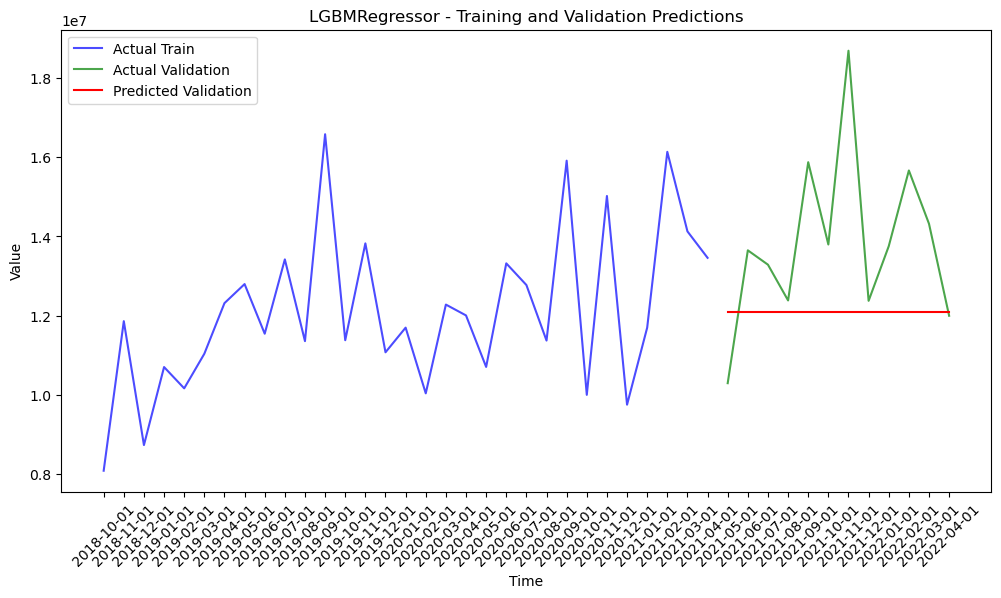

Results appended to ./results/3_results.csv

 Training model for Product Category 1


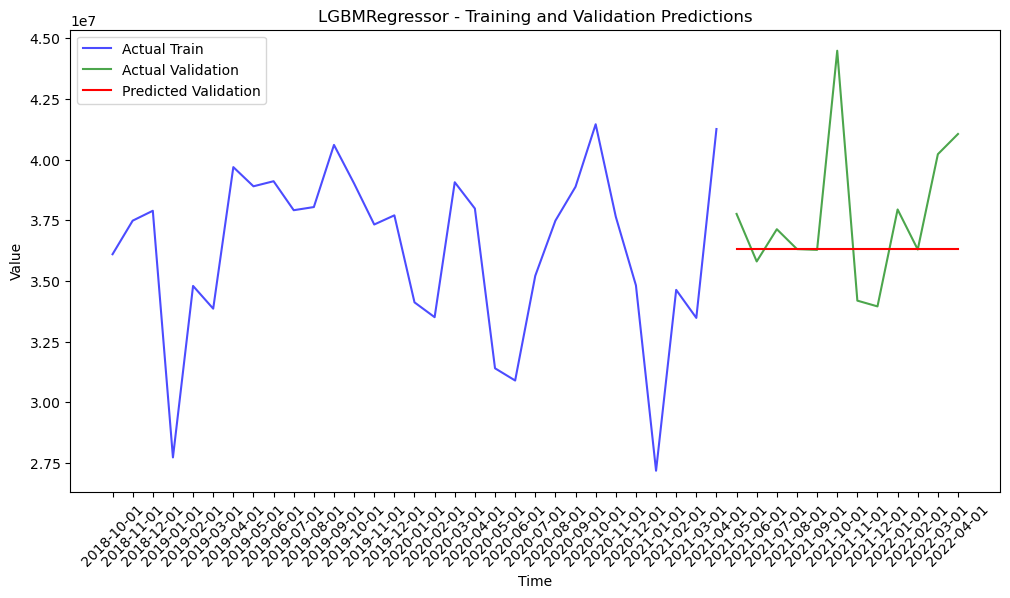

Results appended to ./results/1_results.csv

 Training model for Product Category 14


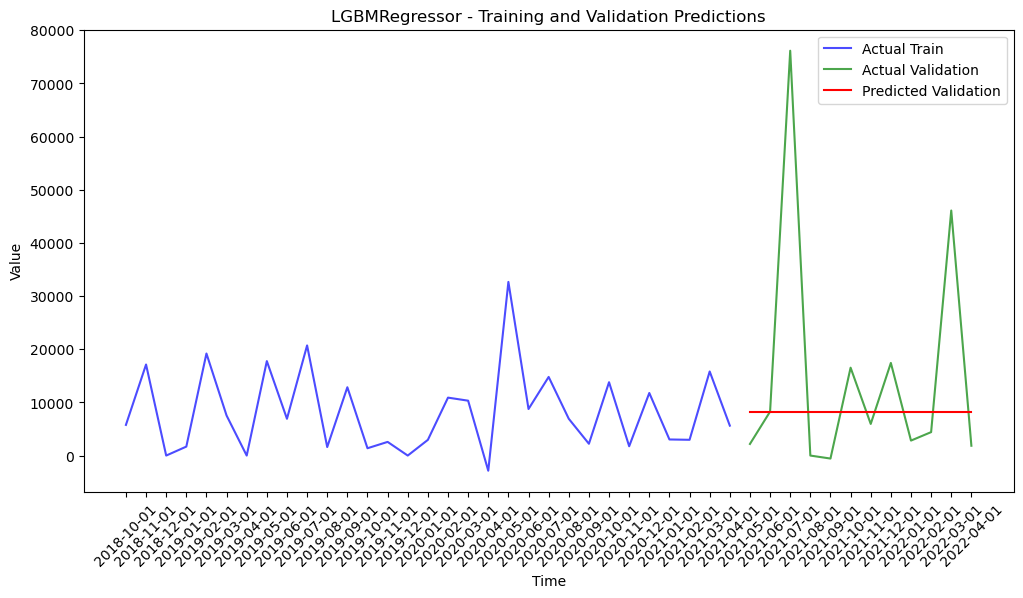

Results appended to ./results/14_results.csv


In [27]:
model_fits = {}
val_preds = {}

model = lgb.LGBMRegressor(verbose = -1)


# XGBoost for all Product Categories
for target_name, selected_features in features.items():
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')

    # Only selected features
    X_train_target = X_train_scaled[selected_features] 
    X_val_target = X_val_scaled[selected_features] 

    # Fit the XGBoost model
    model_fits[target_number], val_preds[target_number] = fs.all_models(
        model,
        X_train_target, X_val_target, 
        target_train, target_val,
        plot=True,
        csv_path=f'./results/{target_number}_results.csv', 
        )

# 4. Results Comparison

In [42]:
folder_path = './results' 

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

results = []

for file in csv_files:
   
    var_name = os.path.splitext(file)[0] 
    var_name = re.sub(r"^\d", r"pc\g<0>", var_name)

    # Create the global variable with the modified name
    globals()[var_name] = pd.read_csv(os.path.join(folder_path, file))

    results.append(var_name)
    print(var_name)

pc4_results
pc8_results
pc1_results
pc16_results
pc13_results
pc14_results
pc9_results
pc36_results
pc5_results
pc11_results
pc12_results
pc20_results
pc6_results
pc3_results


In [43]:
results

['pc4_results',
 'pc8_results',
 'pc1_results',
 'pc16_results',
 'pc13_results',
 'pc14_results',
 'pc9_results',
 'pc36_results',
 'pc5_results',
 'pc11_results',
 'pc12_results',
 'pc20_results',
 'pc6_results',
 'pc3_results']

In [46]:
for df_name in results:
    df = globals()[df_name]

    # Smallest RMSE
    smallest_val_rmse_row = df.loc[df['val_rmse'].idxmin()]

    print(f"Smallest val_rmse row in {df_name}:")
    print(smallest_val_rmse_row)
    print('')

Smallest val_rmse row in pc4_results:
model_type                            HistGradientBoostingRegressor
features_used     ['#1_Lag_1', 'CHI Production Index_Lag_12', '#...
model_params                                                     {}
train_rmse                                                123369.68
val_rmse                                                  170244.87
train_mape (%)                                                37.56
val_mape (%)                                                  28.55
Name: 12, dtype: object

Smallest val_rmse row in pc8_results:
model_type         prophet
features_used          NaN
model_params           NaN
train_rmse             NaN
val_rmse         548766.43
train_mape (%)         NaN
val_mape (%)         28.01
Name: 2, dtype: object

Smallest val_rmse row in pc1_results:
model_type                                                      SVR
features_used     ['CHI Production Index_Lag_12_RollingMean3', '...
model_params                        

pc4_results


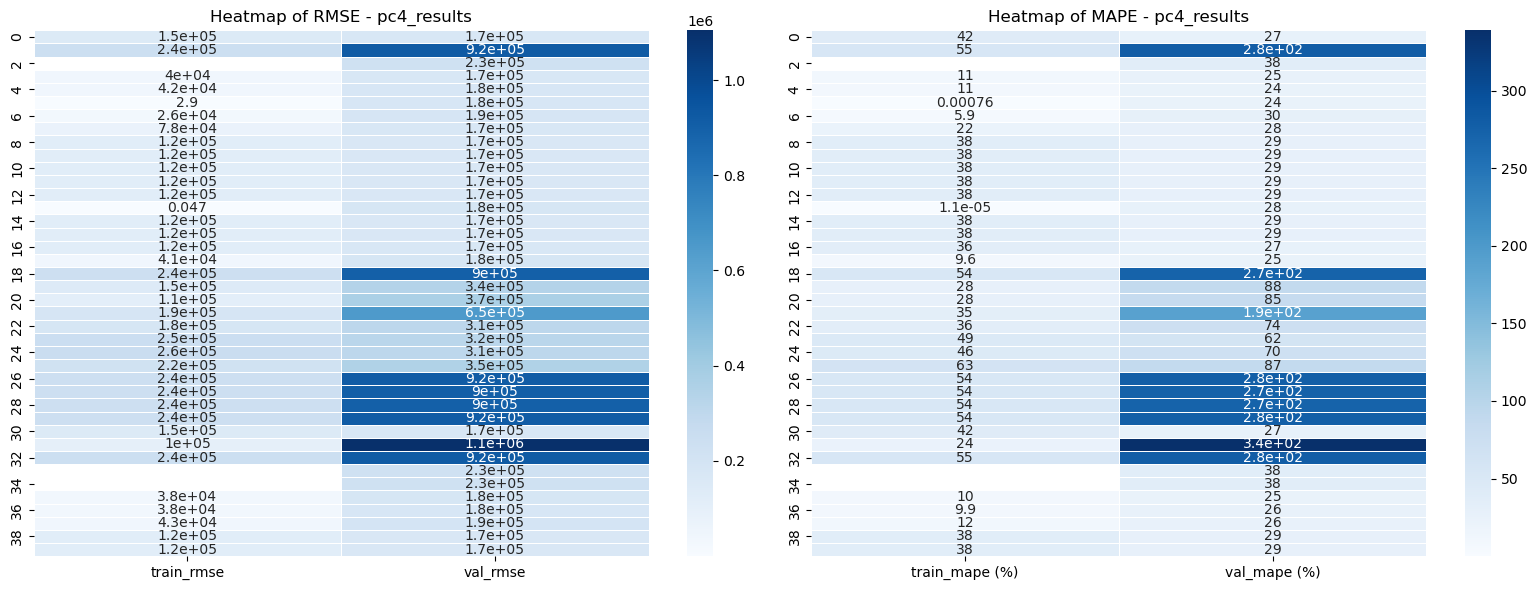

pc8_results


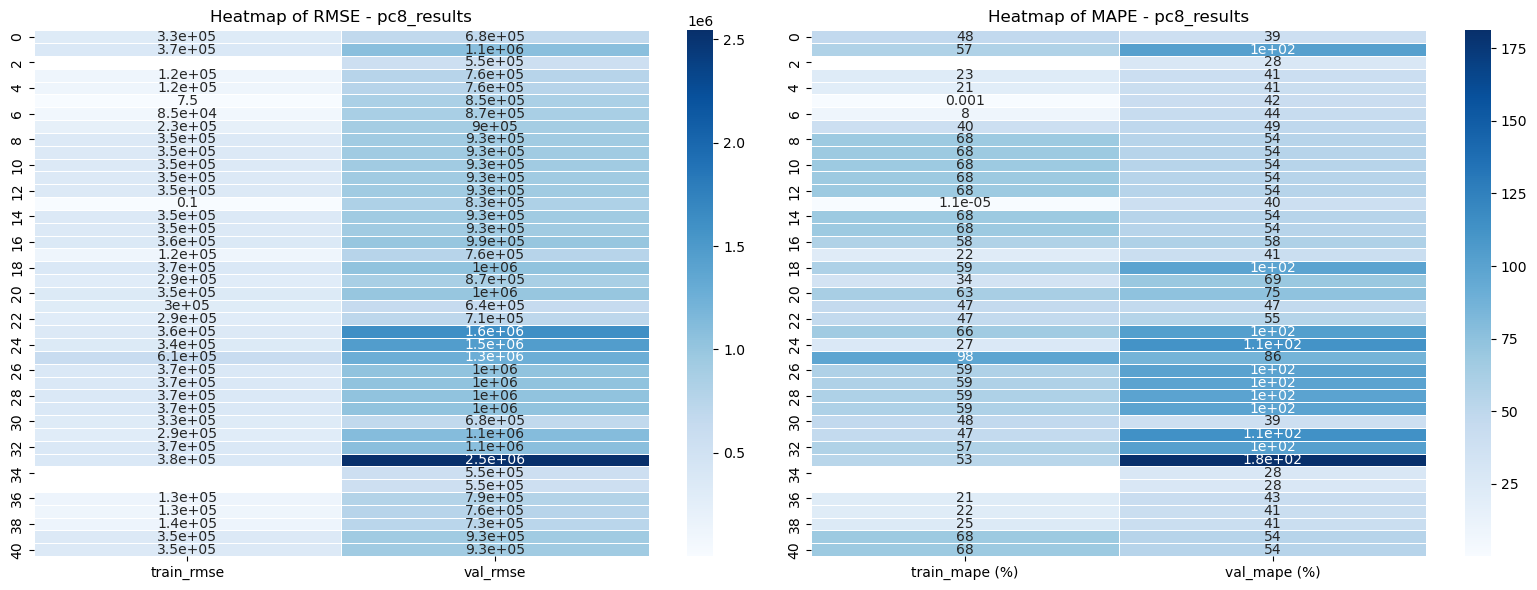

pc1_results


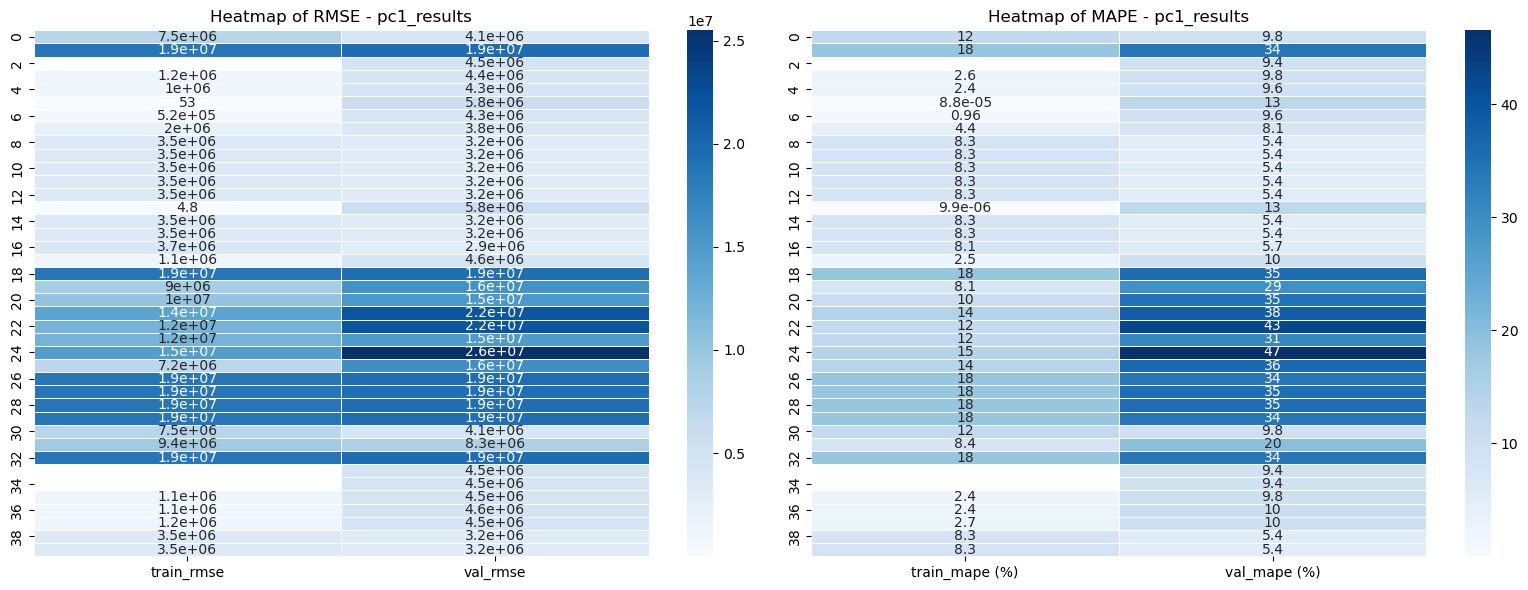

pc16_results


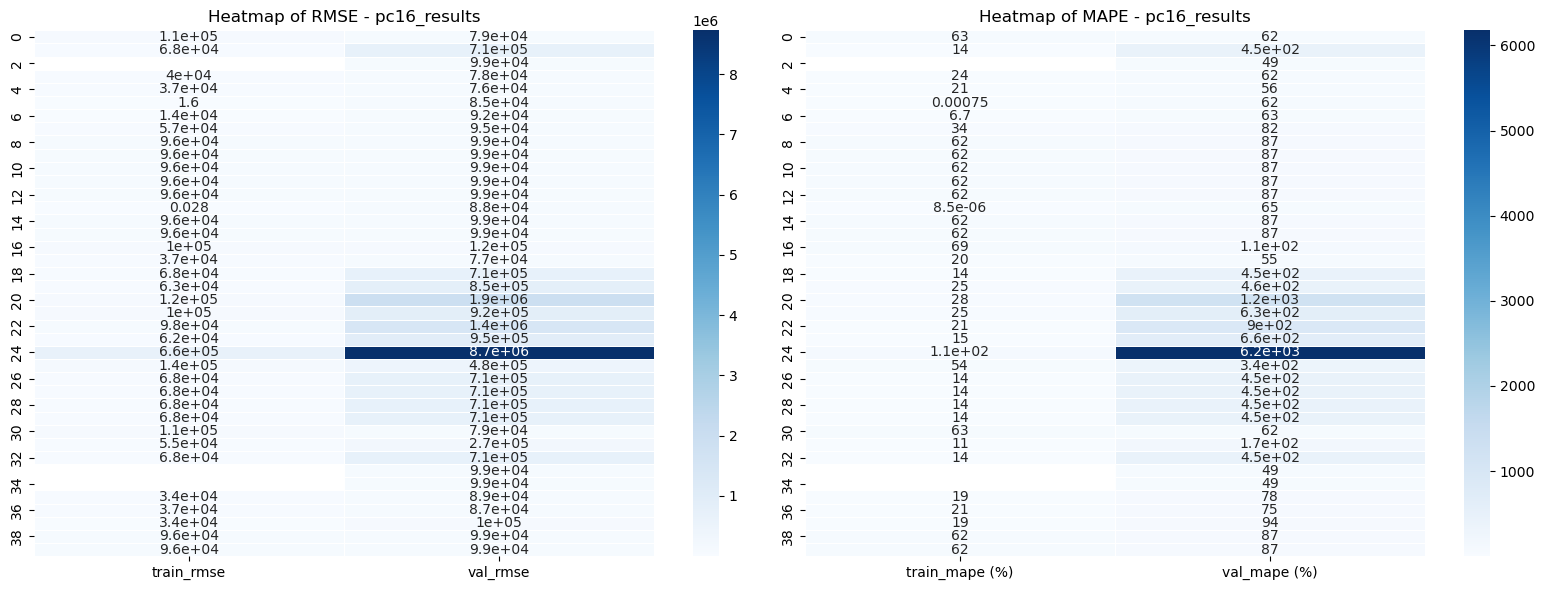

pc13_results


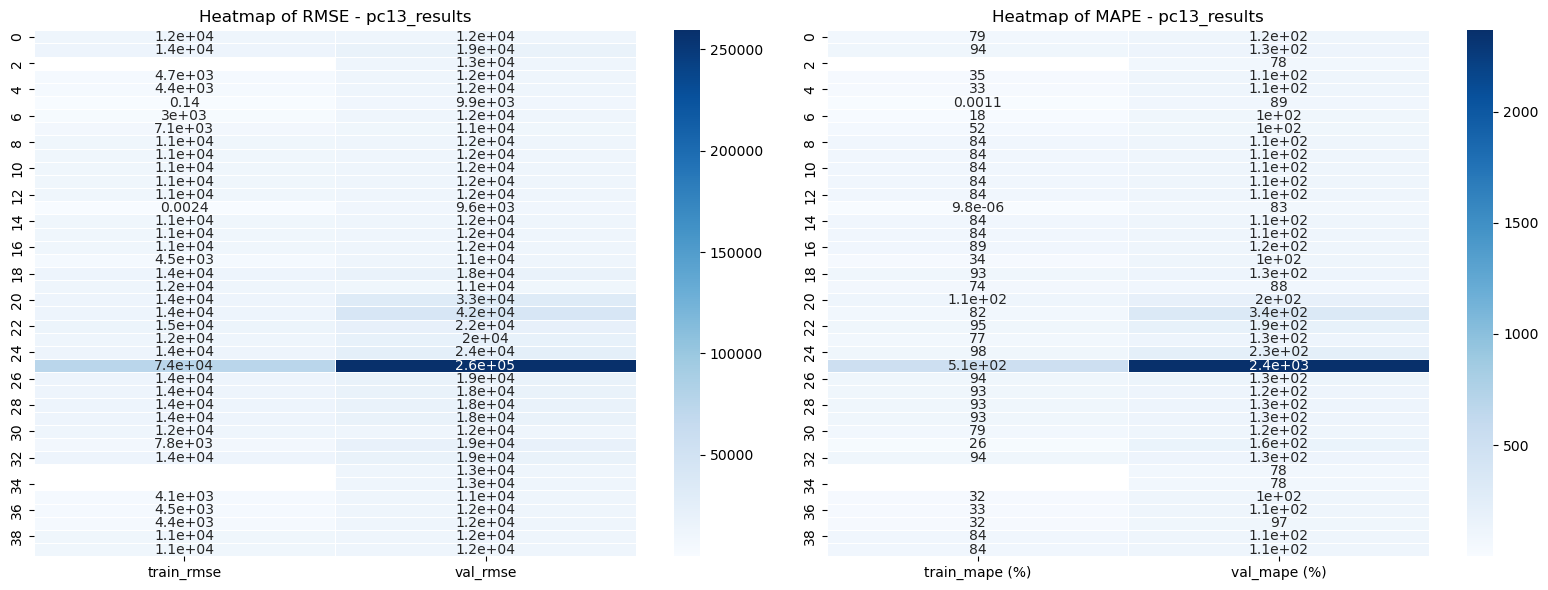

pc14_results


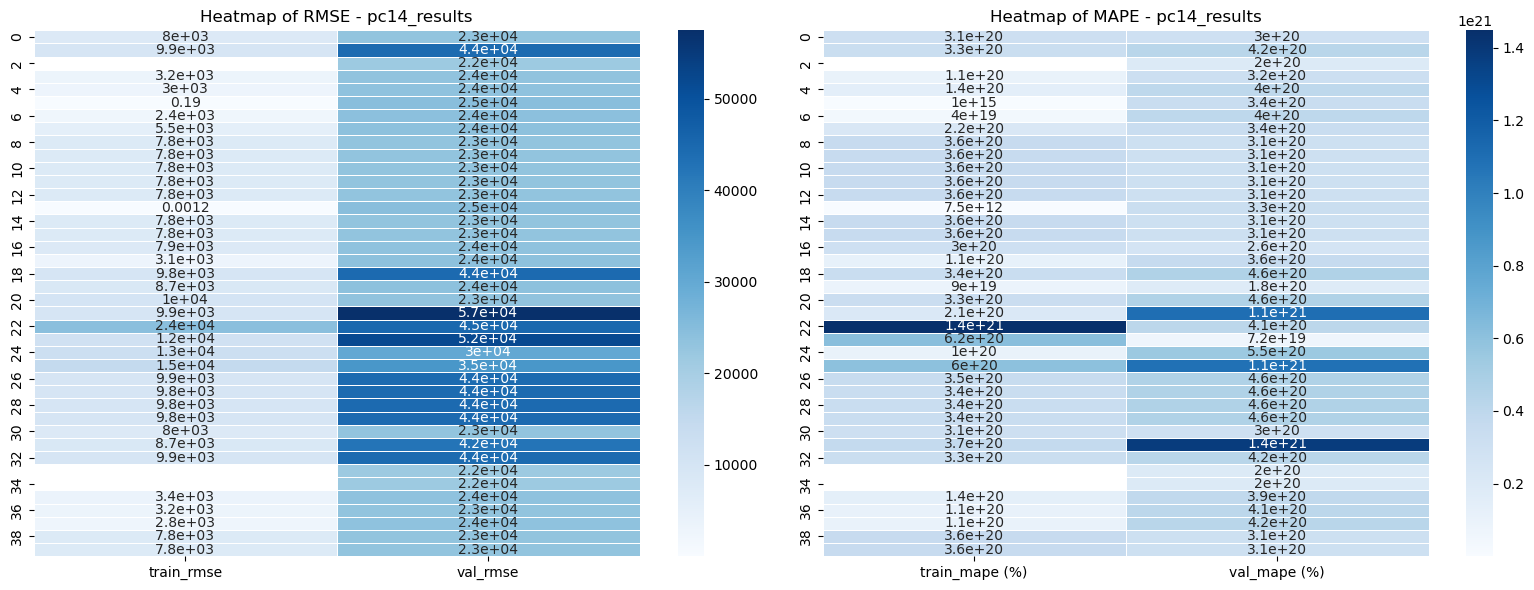

pc9_results


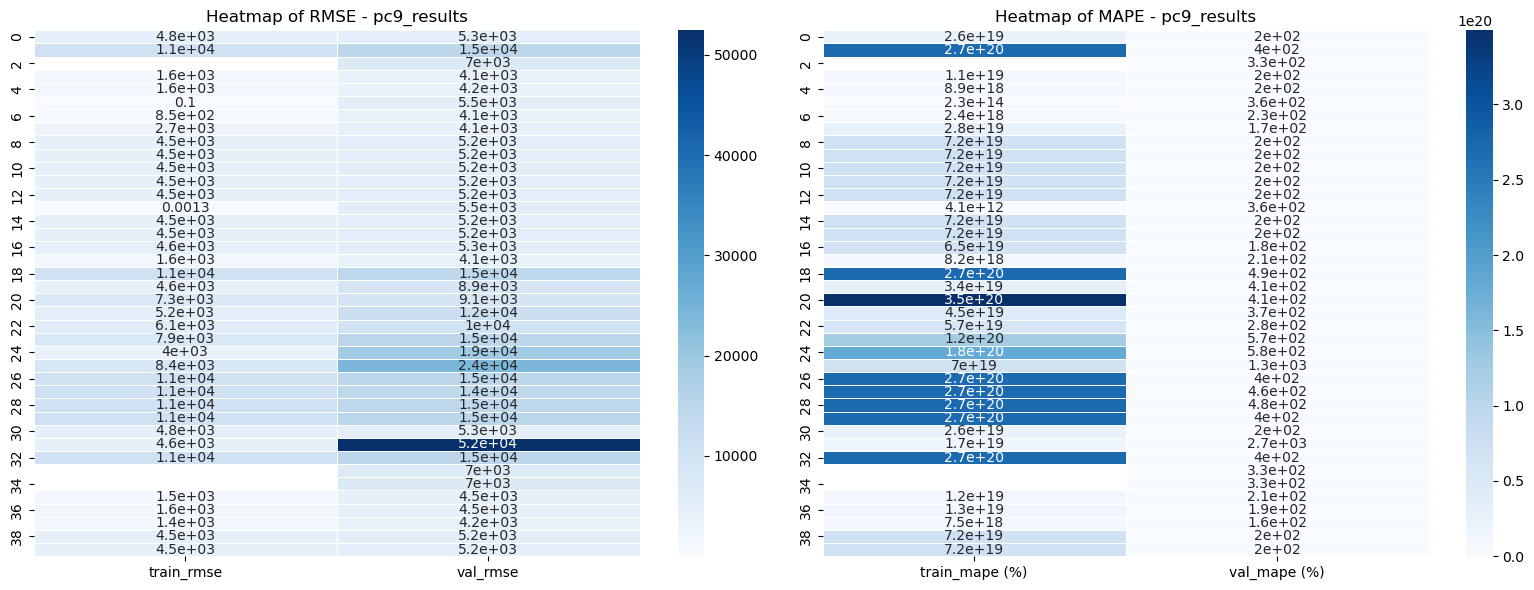

pc36_results


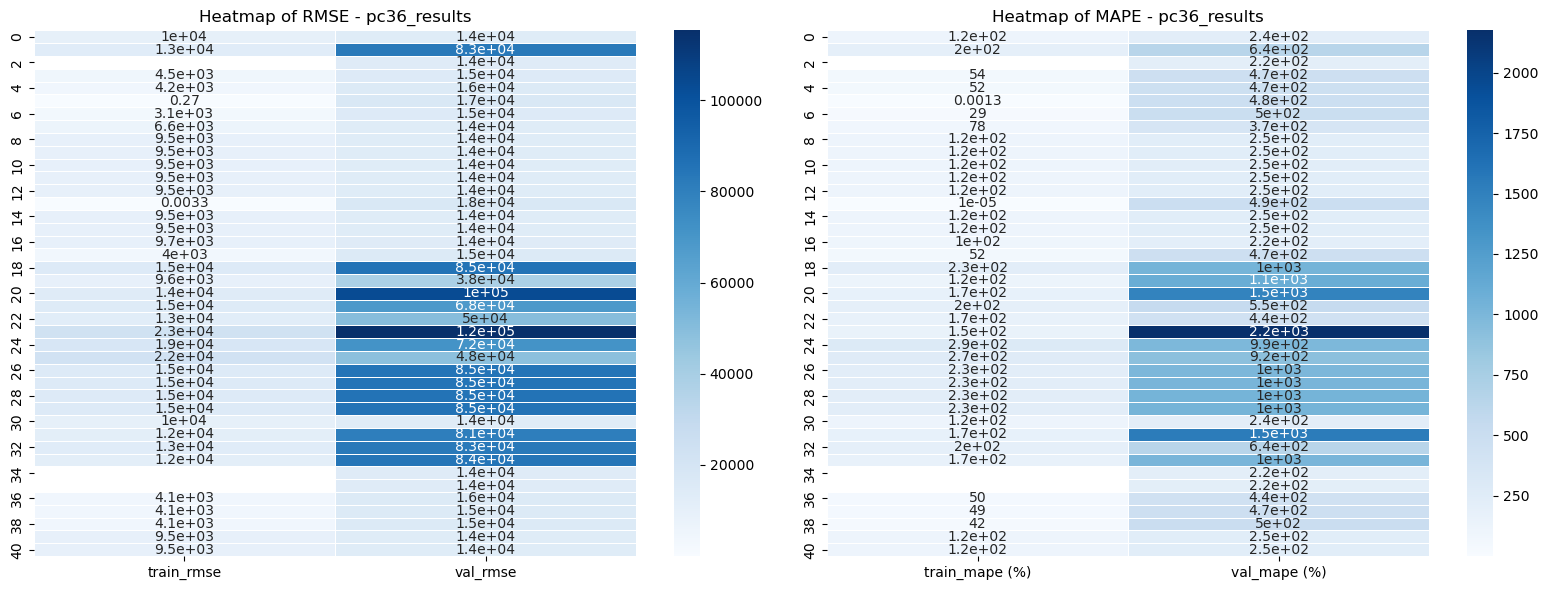

pc5_results


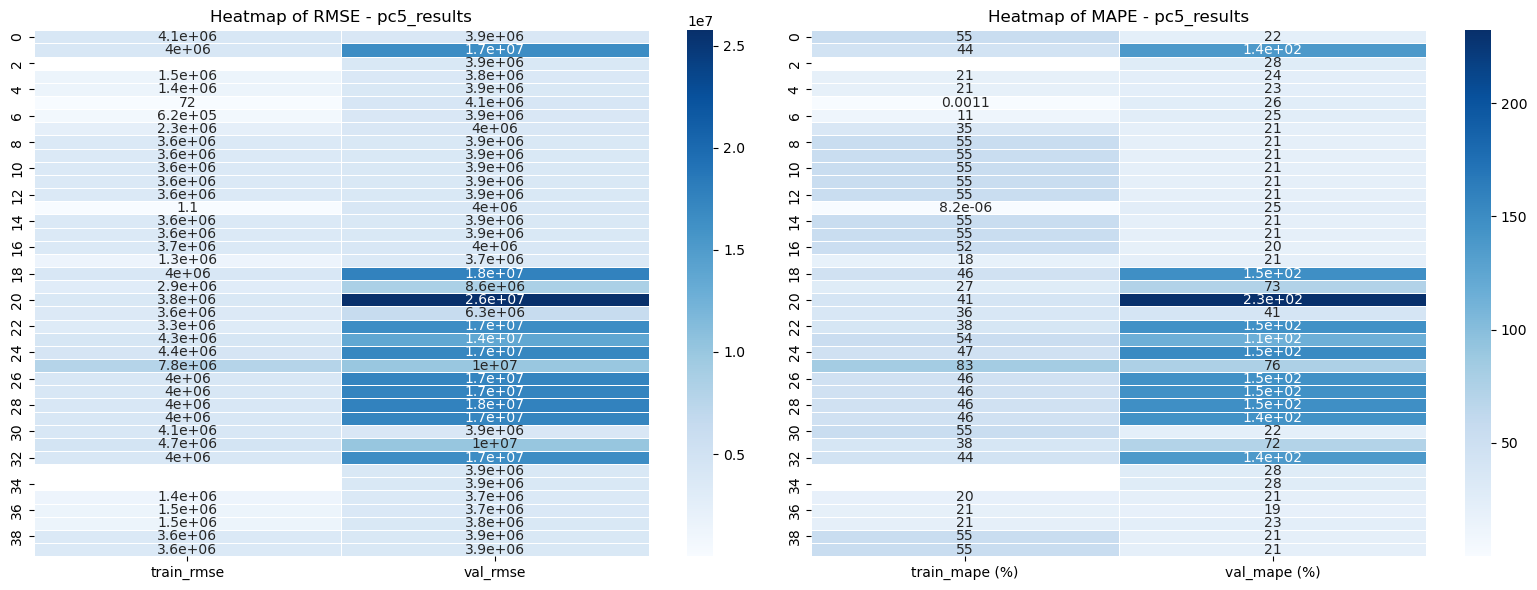

pc11_results


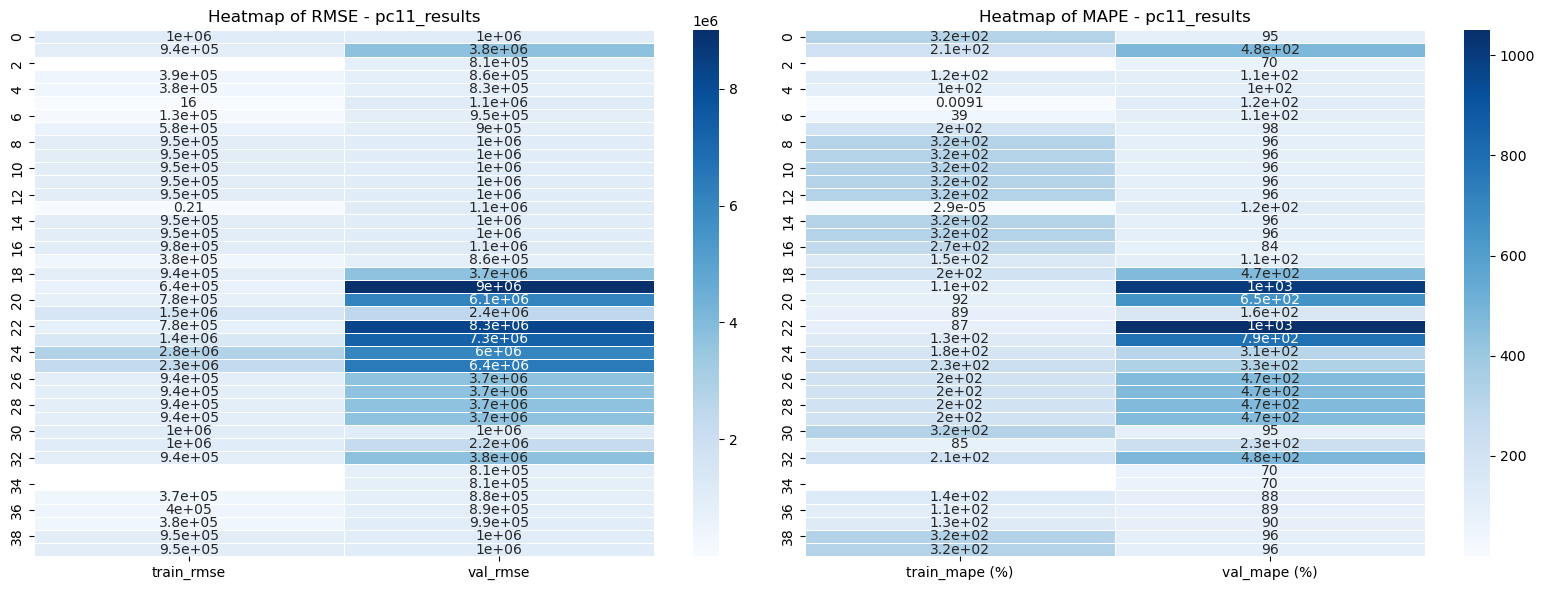

pc12_results


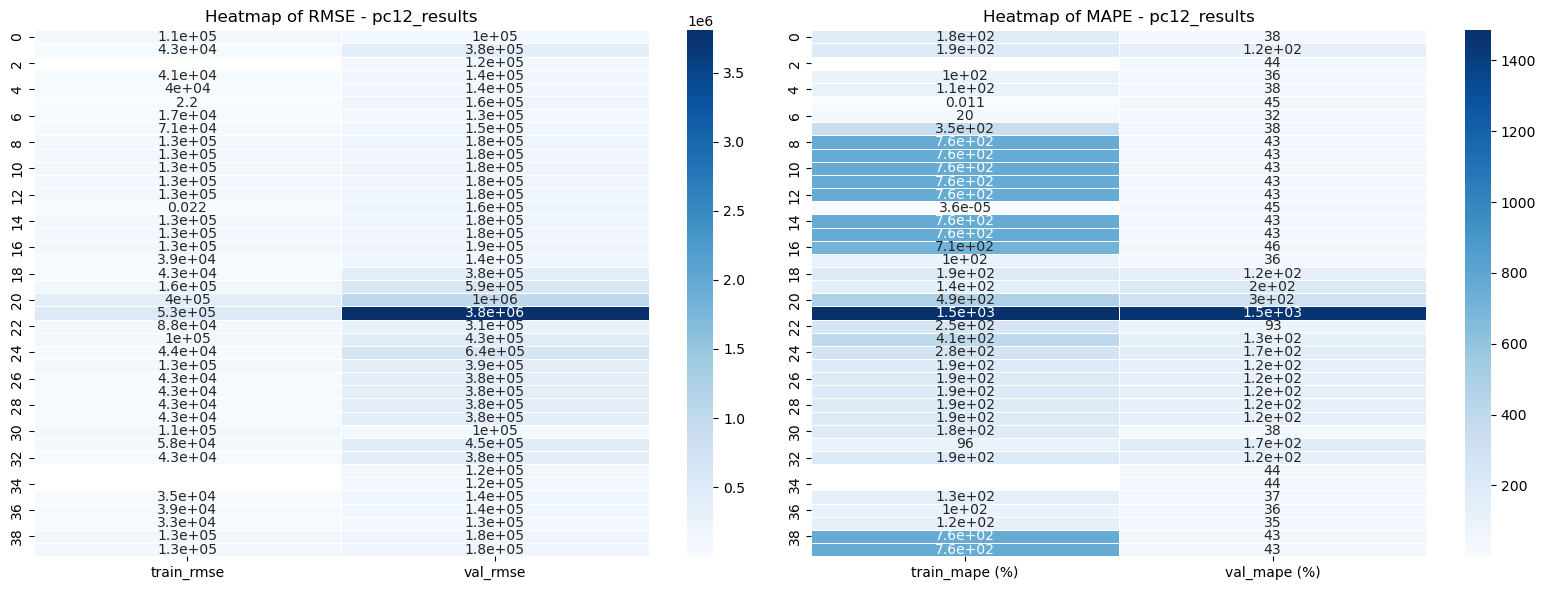

pc20_results


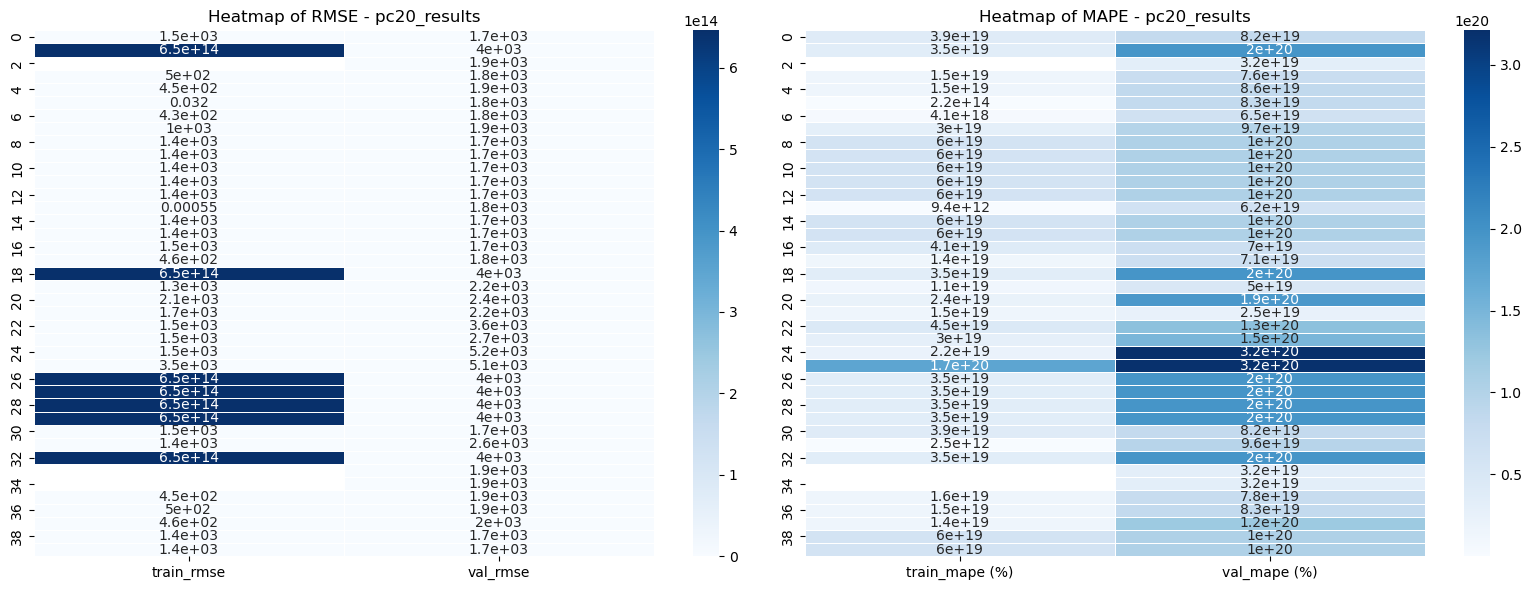

pc6_results


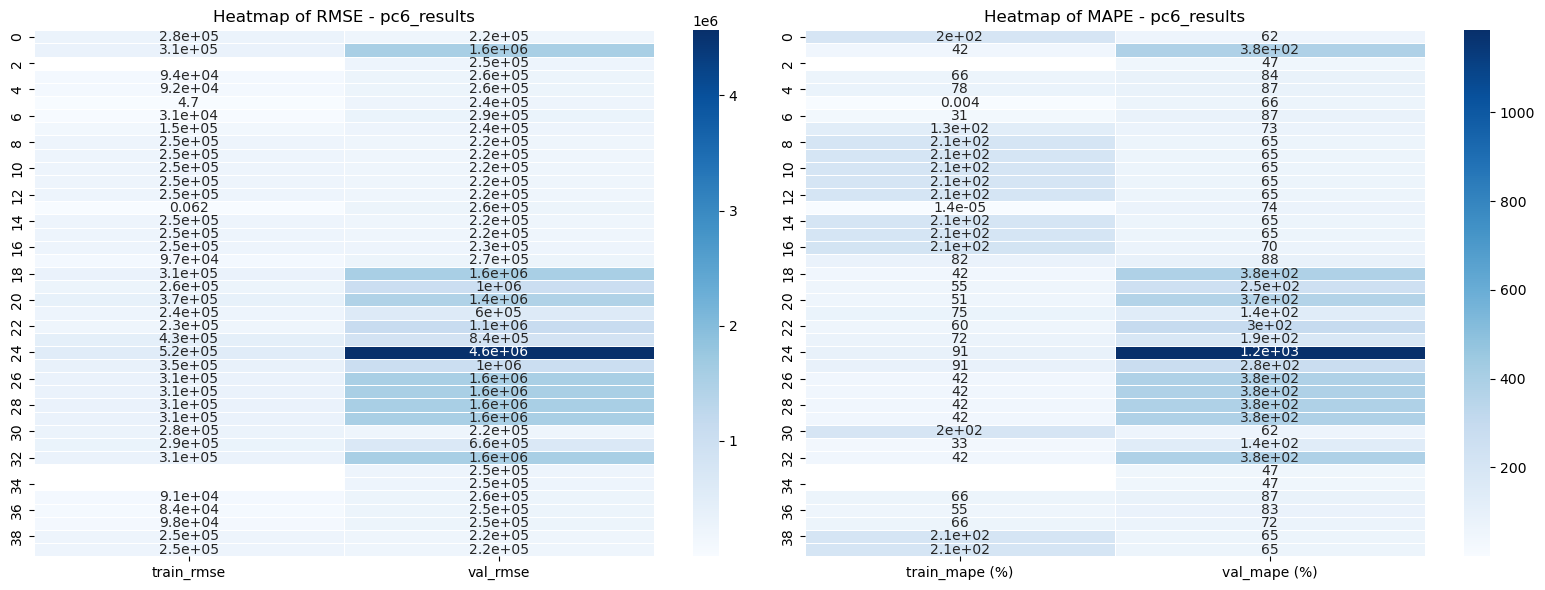

pc3_results


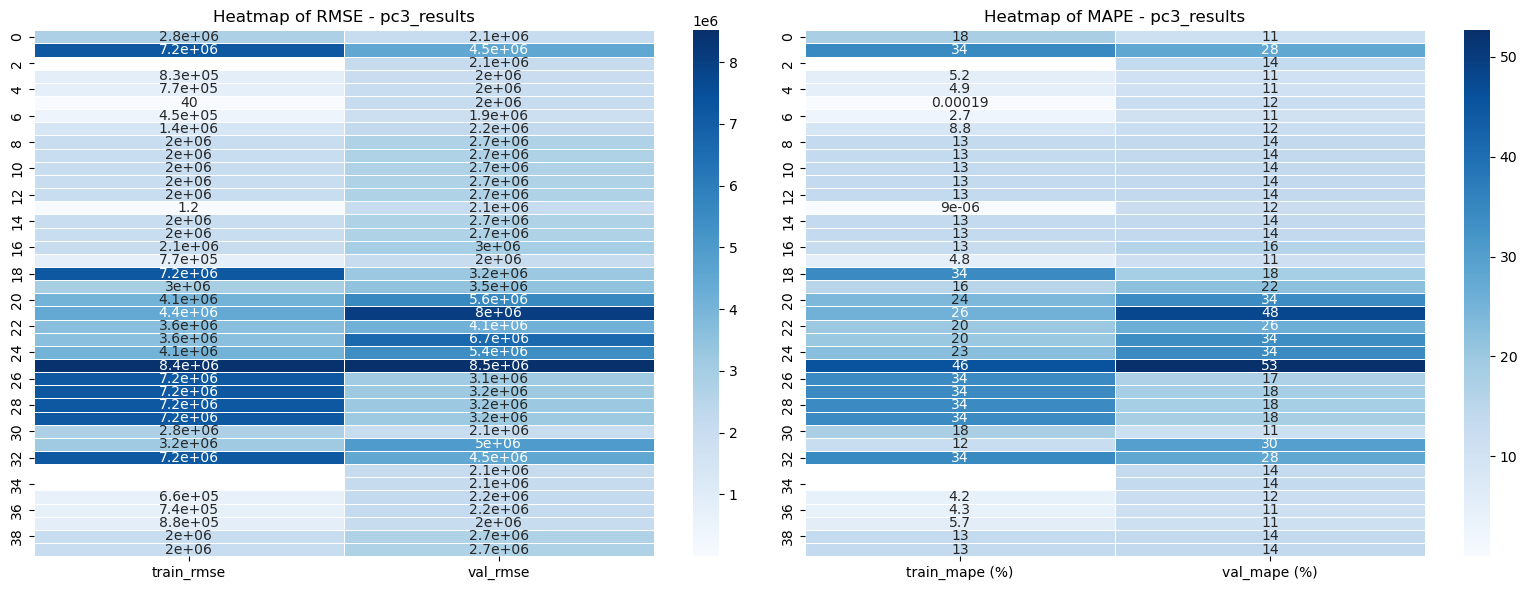

In [56]:
for df_name in results: 
    df = globals()[df_name]

    # Select numeric columns only
    numeric_df = df.select_dtypes(include='number')

    # 2 Subplots
    if numeric_df.shape[1] >= 4:
        first_two_cols = numeric_df.iloc[:, :2]
        second_two_cols = numeric_df.iloc[:, 2:4]
    
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

        sns.heatmap(first_two_cols, annot=True, cmap='Blues', linewidths=0.5, ax=axes[0])
        axes[0].set_title(f"Heatmap of RMSE - {df_name}")

        sns.heatmap(second_two_cols, annot=True, cmap='Blues', linewidths=0.5, ax=axes[1])
        axes[1].set_title(f"Heatmap of MAPE - {df_name}")

        plt.tight_layout()
        plt.show()


In [60]:
for df_name in results:  
    df = globals()[df_name]  
    min_val_rmse = df['val_rmse'].min()  
    min_row = df[df['val_rmse'] == min_val_rmse]

    # Display the result
    print(f"DataFrame: {df_name} ({df.shape})")
    print(f"Lowest val_rmse: {min_val_rmse}")
    print("Row(s) with Minimum val_rmse:")
    print(min_row)
    print("-" * 50)


DataFrame: pc4_results ((40, 7))
Lowest val_rmse: 170244.8697155733
Row(s) with Minimum val_rmse:
                       model_type  \
12  HistGradientBoostingRegressor   
14  HistGradientBoostingRegressor   
15  HistGradientBoostingRegressor   

                                        features_used model_params  \
12  ['#1_Lag_1', 'CHI Production Index_Lag_12', '#...           {}   
14  ['#1_Lag_1', 'CHI Production Index_Lag_12', '#...           {}   
15  ['#1_Lag_1', 'CHI Production Index_Lag_12', '#...           {}   

    train_rmse  val_rmse  train_mape (%)  val_mape (%)  
12   123369.68 170244.87           37.56         28.55  
14   123369.68 170244.87           37.56         28.55  
15   123369.68 170244.87           37.56         28.55  
--------------------------------------------------
DataFrame: pc8_results ((41, 7))
Lowest val_rmse: 548766.4332126979
Row(s) with Minimum val_rmse:
   model_type features_used model_params  train_rmse  val_rmse  \
2     prophet           NaN  

In [62]:
df.iloc[12]

model_type                            HistGradientBoostingRegressor
features_used     ['GerHolidayCount', '#20_Lag_1', '#14_Lag_1', ...
model_params                                                     {}
train_rmse                                               2017879.75
val_rmse                                                 2706945.35
train_mape (%)                                                13.44
val_mape (%)                                                  13.71
Name: 12, dtype: object